In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano

# Using prebuilt module GLM

In [2]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])

data = dict(x=x_out, y=y_out)

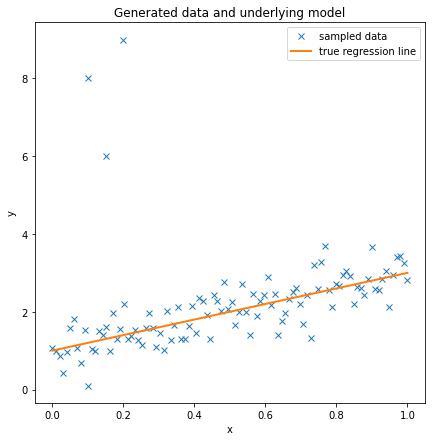

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);



In [4]:
with pm.Model() as model:
    pm.glm.GLM.from_formula("y ~ x", data)
    trace = pm.sample(2000, cores=2)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
<ipython-input-4-80d952c094eb>:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


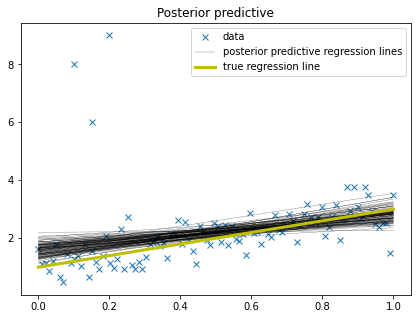

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, "x", label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

plt.legend(loc=0);



The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
<ipython-input-8-4f22a7df8f3a>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_robust = pm.sample(2000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lam, x, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


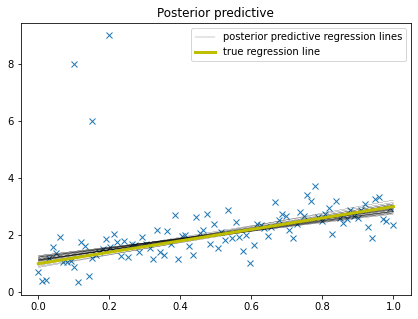

In [8]:
with pm.Model() as model_robust:
    family = pm.glm.families.StudentT()
    pm.glm.GLM.from_formula("y ~ x", data, family=family)
    trace_robust = pm.sample(2000, cores=2)

plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, "x")
pm.plot_posterior_predictive_glm(trace_robust, label="posterior predictive regression lines")
plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")
plt.legend();

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


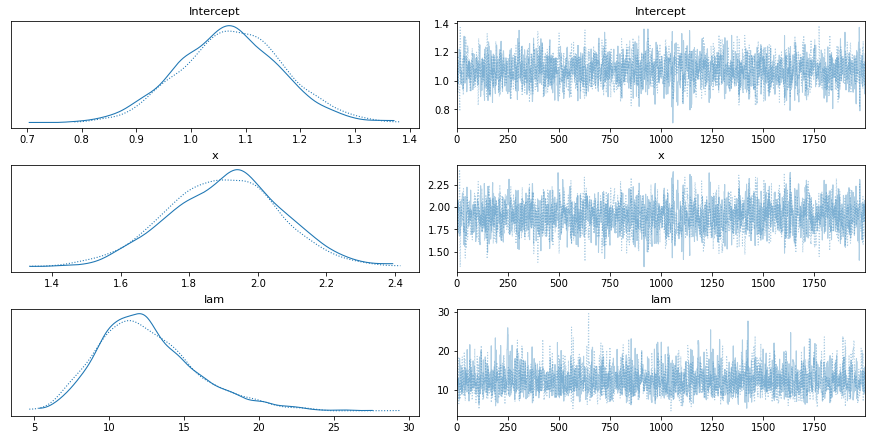

In [10]:
pm.plot_trace(trace_robust);

In [13]:
with model_robust:
    a = pm.find_MAP()

# Build yourself a regression model

## For data without outliers
    - we can handle just find with Normal Likelihood 

<ipython-input-105-b25dc0c3efbc>:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


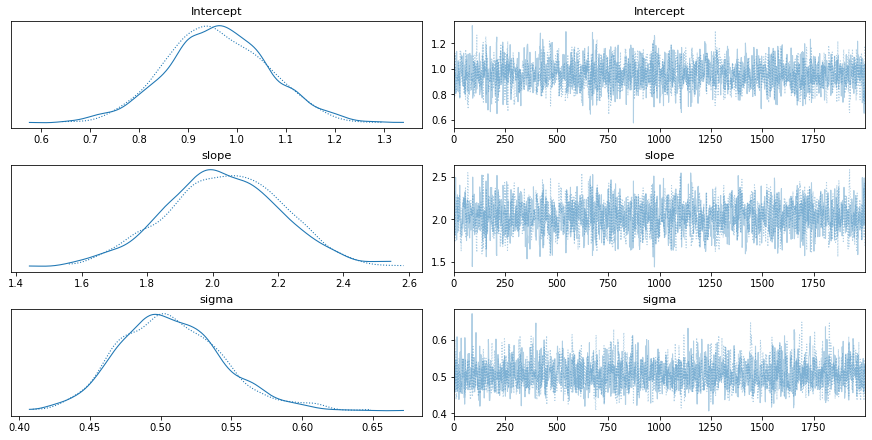

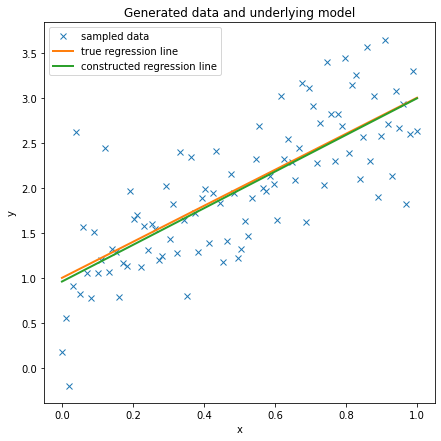

In [105]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)


with pm.Model() as lr:
    intercept = Normal("Intercept",mu=0, sigma=20)
    x_coeff = Normal("slope",mu=0,sigma=20)
    
    sigma = Exponential("sigma", 1.)
    mu = intercept + x_coeff * x
    
    lkl = Normal('y',mu=mu,sigma=sigma,observed=y)
    
    trace = pm.sample(2000, cores=2)
    
plot_trace(trace);    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




## With some outliers and Normal Likelihood
    

<ipython-input-134-2d4fef5db836>:25: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
The acceptance probability does not match the target. It is 0.8820498993438568, but should be close to 0.8. Try to increase the number of tuning steps.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


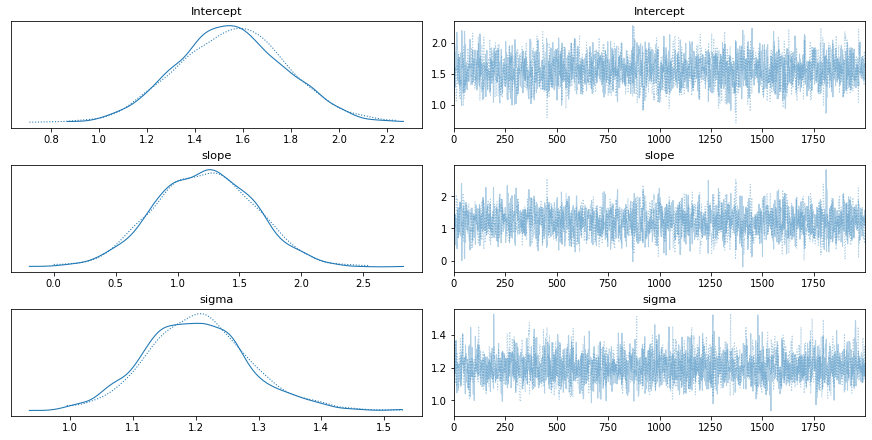

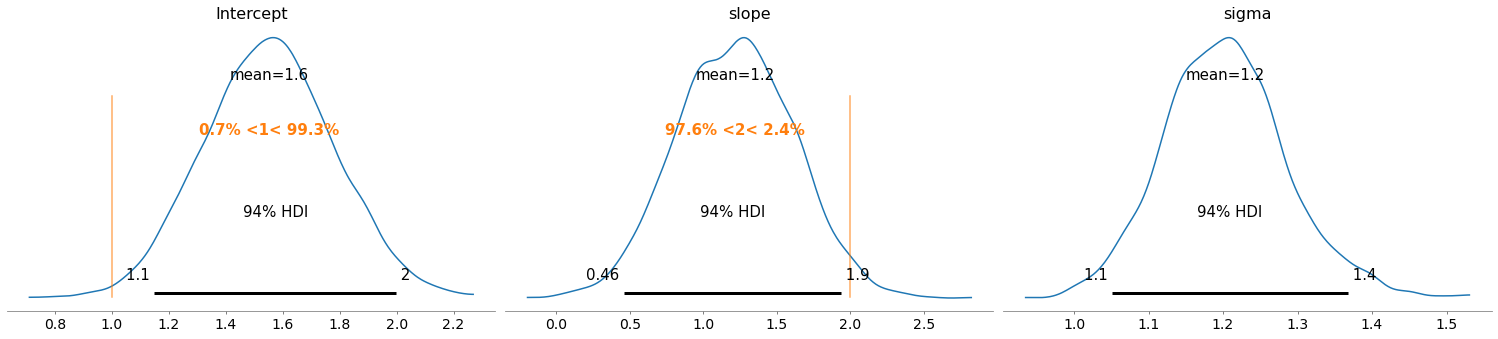

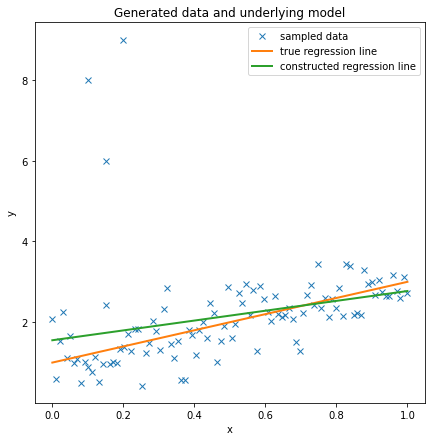

In [134]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])


with pm.Model() as lr:
    intercept = Normal("Intercept",mu=0, sigma=20)
    x_coeff = Normal("slope",mu=0,sigma=20)
    
    sigma = Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    lkl = Normal('y',mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000, cores=2)
    
plot_trace(trace);    
plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




## Robust regression with StudentT 

<ipython-input-136-7703f4977ade>:25: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


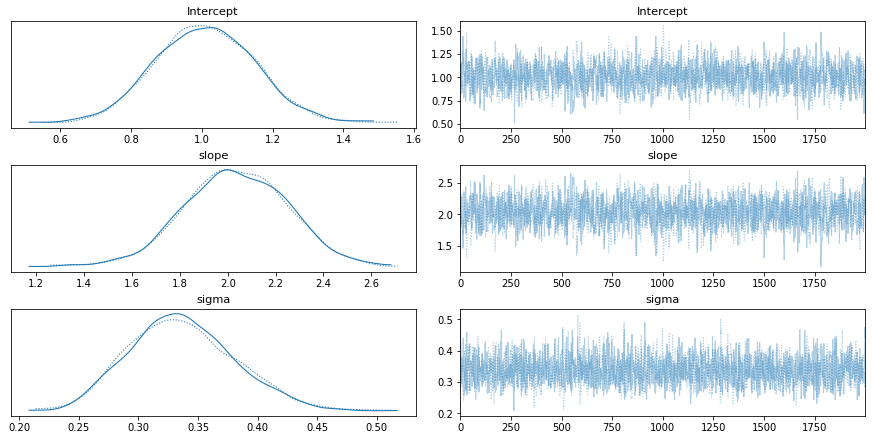

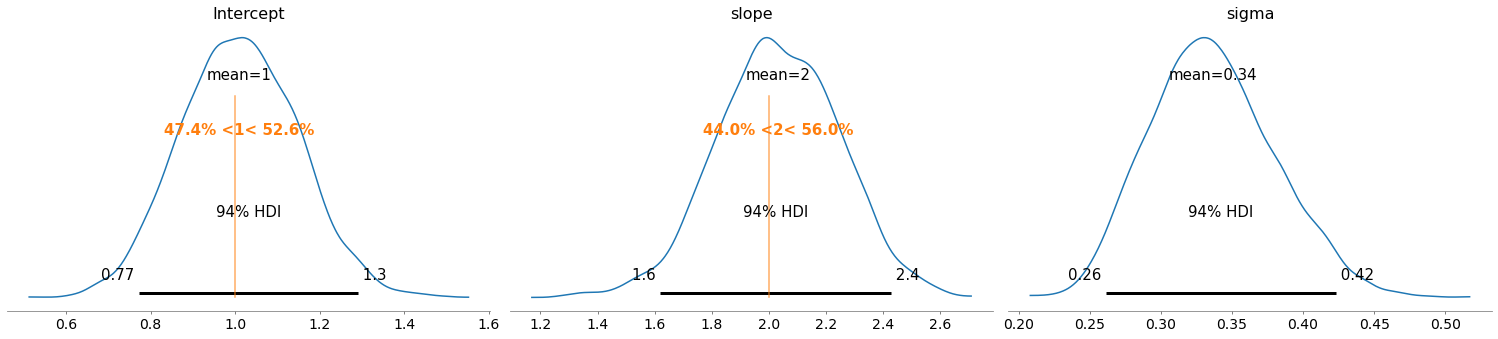

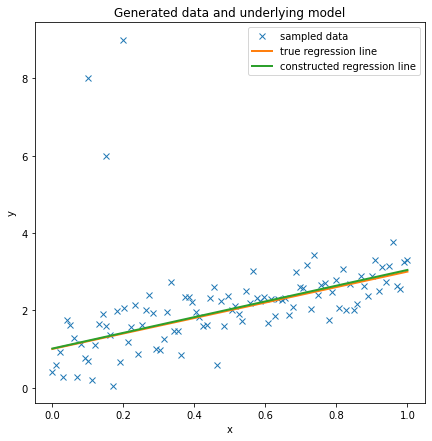

In [136]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])


with pm.Model() as lr:
    intercept = Normal("Intercept",mu=0, sigma=20)
    x_coeff = Normal("slope",mu=0,sigma=20)
    
    sigma = Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    lkl = StudentT('y',nu=1,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000, cores=2)
    
plot_trace(trace);    
plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




## with Student T dist, but with high Nu (resemble Normal)

<ipython-input-140-bcf026d61440>:25: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 9 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


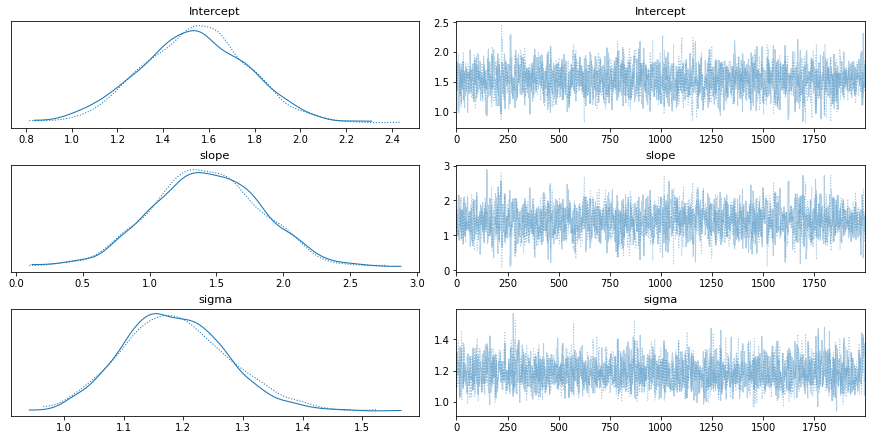

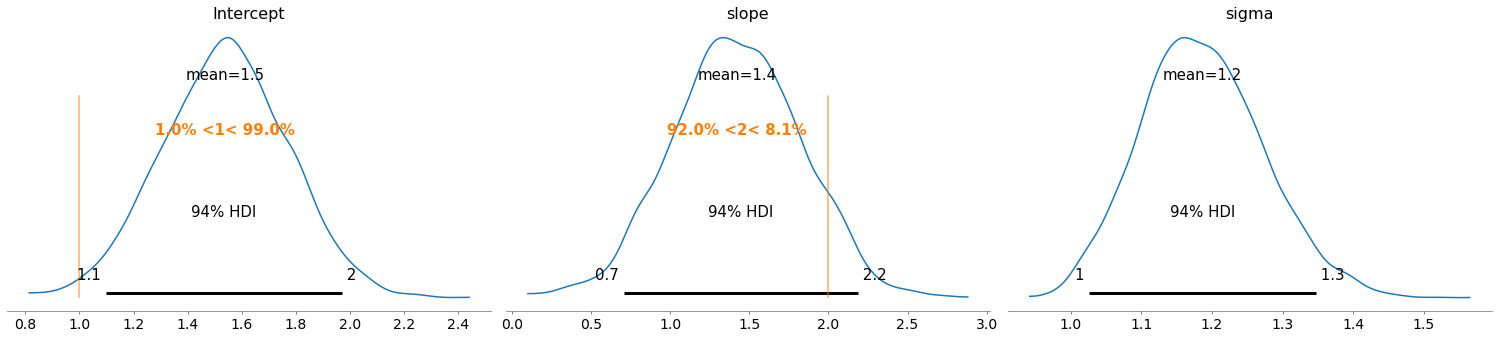

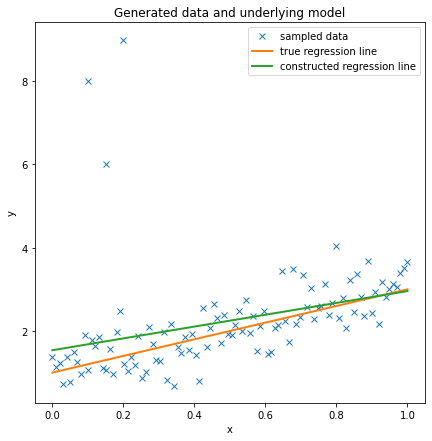

In [140]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])


with pm.Model() as lr:
    intercept = Normal("Intercept",mu=0, sigma=20)
    x_coeff = Normal("slope",mu=0,sigma=20)
    
    sigma = Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    lkl = StudentT('y',nu=1e6,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000, cores=2)
    
plot_trace(trace);    
plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




## Hyperpriors on degree of fredom for Student t 

<ipython-input-8-560f37d9cb3c>:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


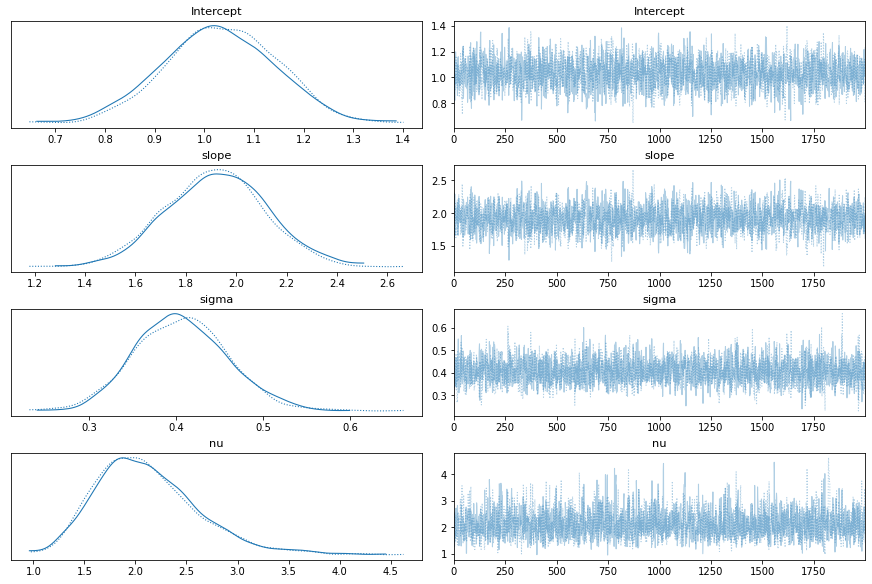

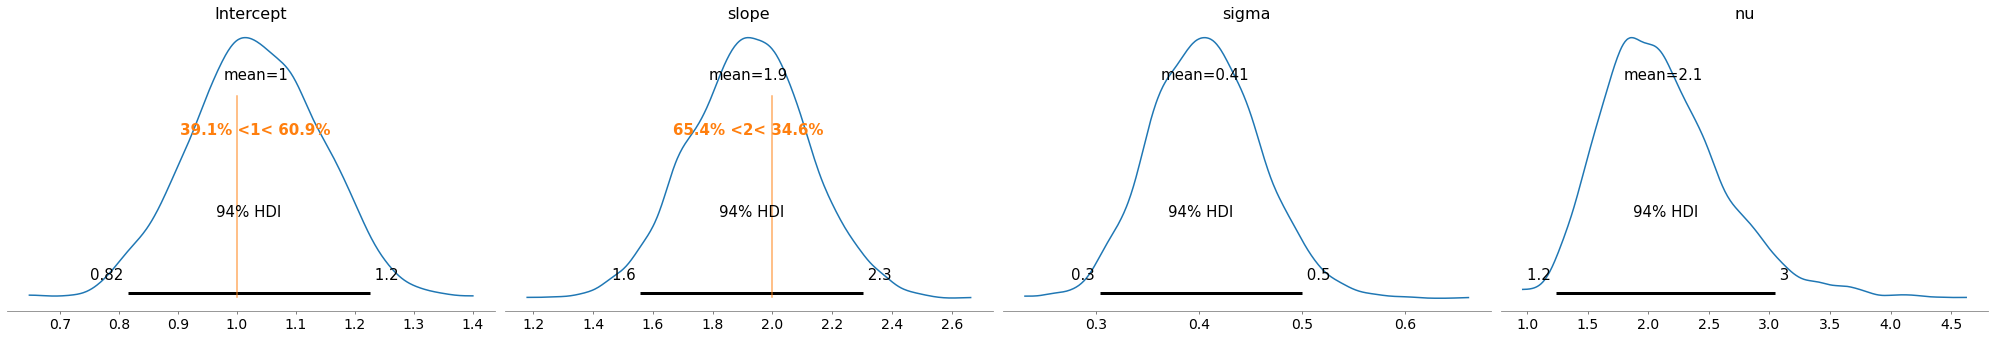

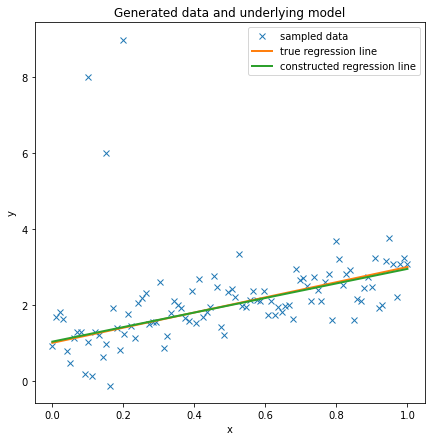

In [8]:

    
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])


with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    # https://docs.pymc.io/pymc-examples/examples/generalized_linear_models/GLM-robust-with-outlier-detection.html
    # define prior for StudentT degrees of freedom
    # InverseGamma has nice properties:
    # it's continuous and has support x ∈ (0, inf)
    
    nu = pm.InverseGamma("nu", alpha=1, beta=1)
    
    
    lkl = pm.StudentT('y',nu=nu,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000, cores=2)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




## Terrible priors affect the 

<ipython-input-10-2ae666c5cc4a>:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 10 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


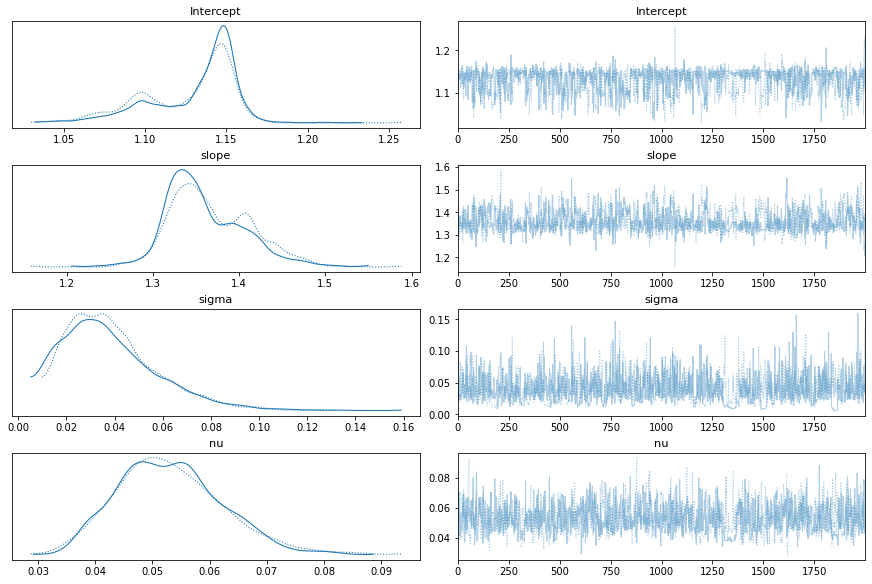

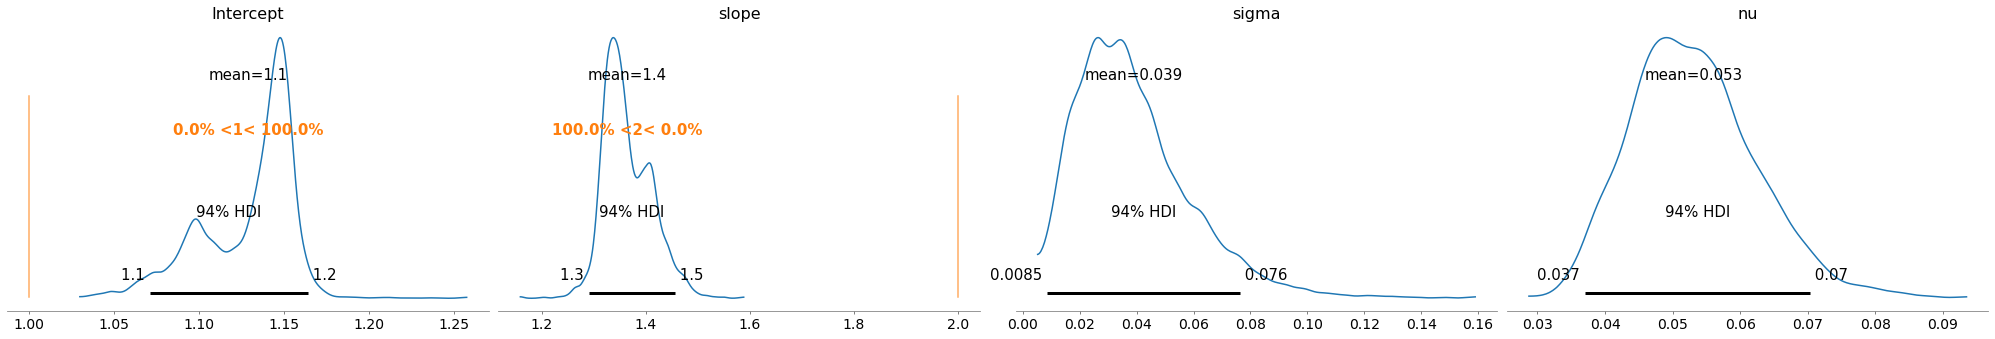

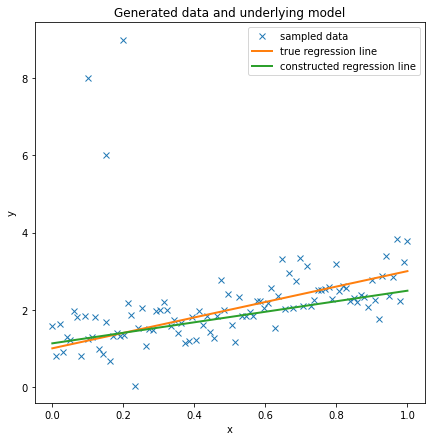

In [10]:

    
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])


with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    # https://docs.pymc.io/pymc-examples/examples/generalized_linear_models/GLM-robust-with-outlier-detection.html
    # define prior for StudentT degrees of freedom
    # InverseGamma has nice properties:
    # it's continuous and has support x ∈ (0, inf)
    
    nu = pm.InverseGamma("nu", alpha=100, beta=1)
    
    
    lkl = pm.StudentT('y',nu=nu,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000, cores=2)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




## Cauchy distribution (special case of student t where nu =1 

<ipython-input-65-8d81032229e3>:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


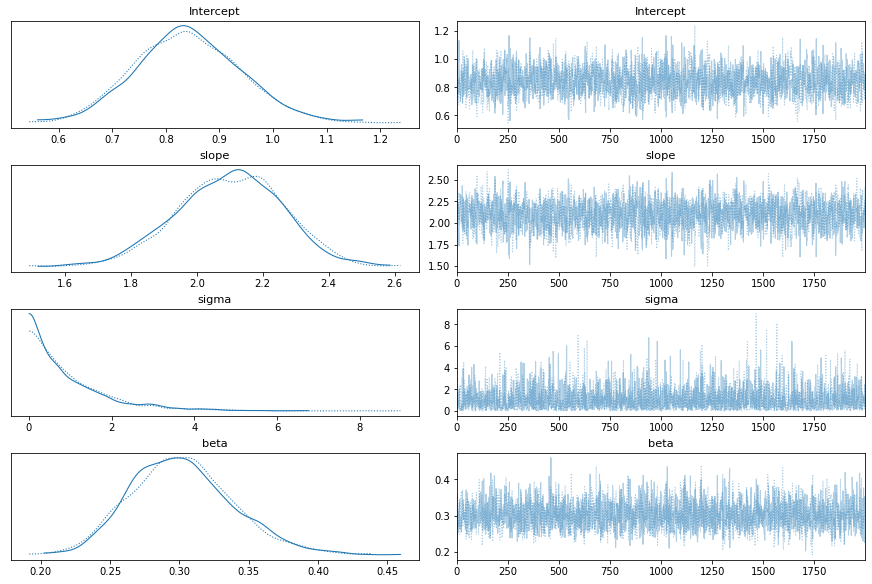

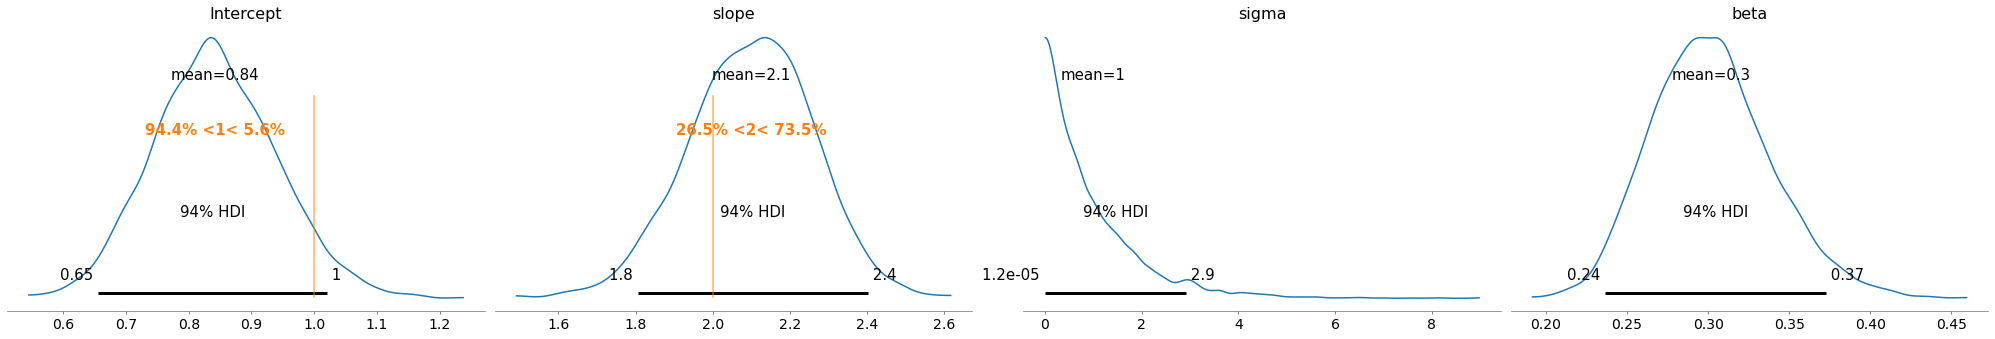

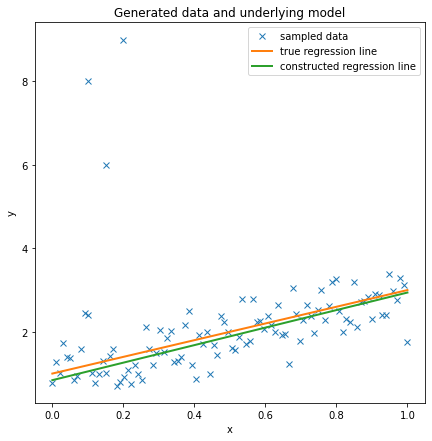

In [65]:

    
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])


with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    # https://docs.pymc.io/pymc-examples/examples/generalized_linear_models/GLM-robust-with-outlier-detection.html
    # define prior for StudentT degrees of freedom
    # InverseGamma has nice properties:
    # it's continuous and has support x ∈ (0, inf)
    
    b = pm.InverseGamma("beta", alpha=1, beta=1)
    
    
    lkl = pm.Cauchy('y',alpha=mu,beta=b,observed=y_out)
    
    trace = pm.sample(2000, cores=2)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




As you can see, the cauchy likelihood completely disregard the outliers by moving down lower the true regression line. For this case, a slight overfit to the data at the lower end 

# Laplace distribution family

<ipython-input-106-dd947bb47b93>:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=8)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [beta, sigma, slope, Intercept]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 27 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


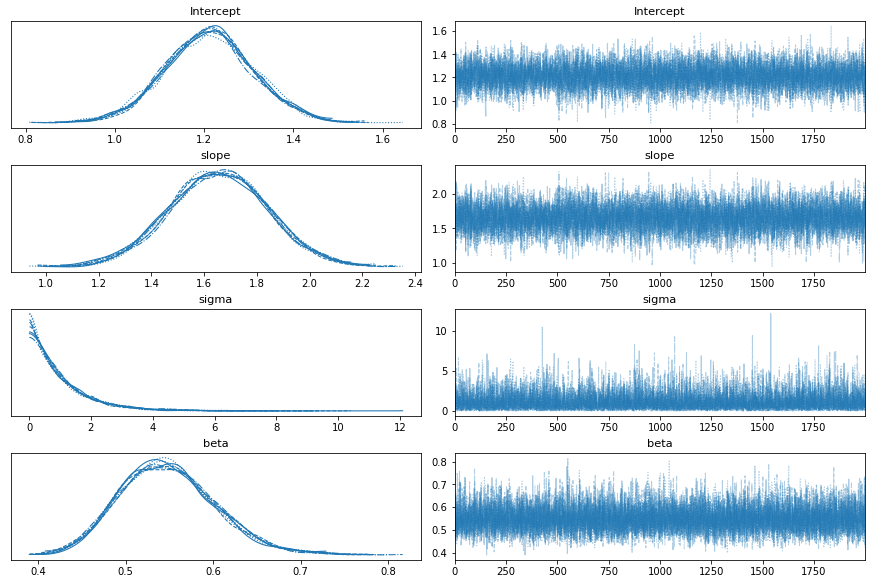

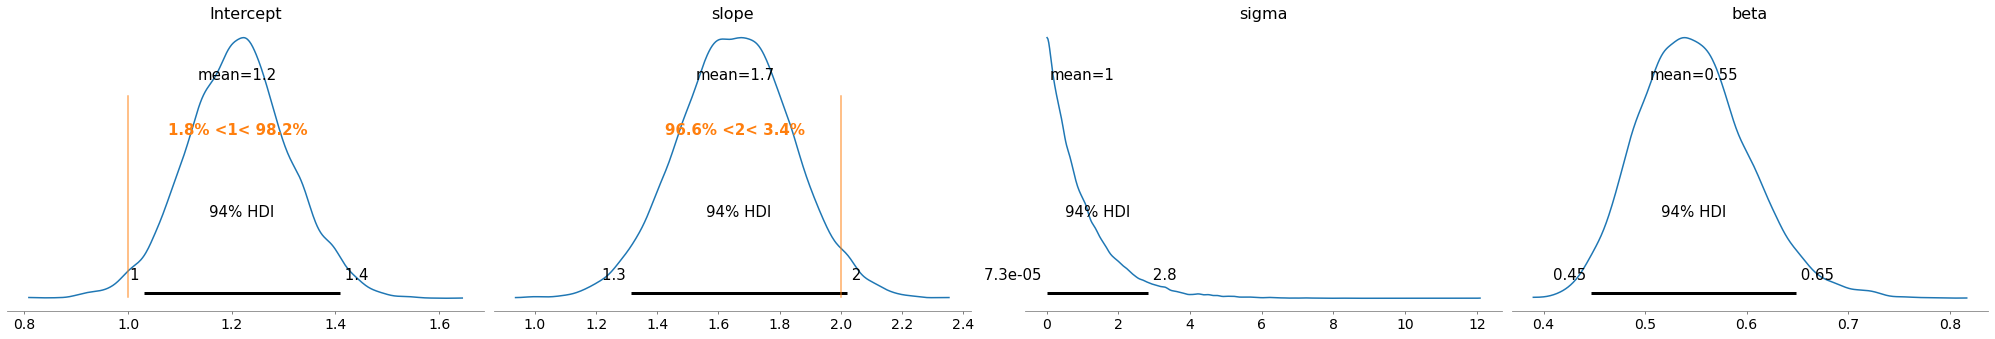

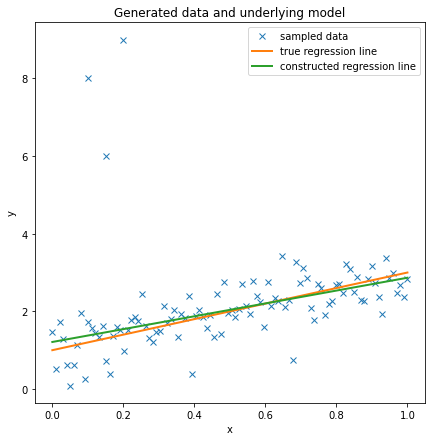

In [106]:

    
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])


with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    # https://docs.pymc.io/pymc-examples/examples/generalized_linear_models/GLM-robust-with-outlier-detection.html
    # define prior for StudentT degrees of freedom
    # InverseGamma has nice properties:
    # it's continuous and has support x ∈ (0, inf)
    
    b = pm.InverseGamma("beta", alpha=1, beta=1)
    
    
    lkl = pm.Laplace('y',mu=mu,b=b,observed=y_out)
    
    trace = pm.sample(2000, cores=8)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




Laplace seems to have enough tailness to handle far away outliers 

# How robust is robust: bigger datasets 

## Student T likelihood 

<ipython-input-107-6daf4c1aa76b>:28: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=8)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 26 seconds.
The acceptance probability does not match the target. It is 0.8890807141265132, but should be close to 0.8. Try to increase the number of tuning steps.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


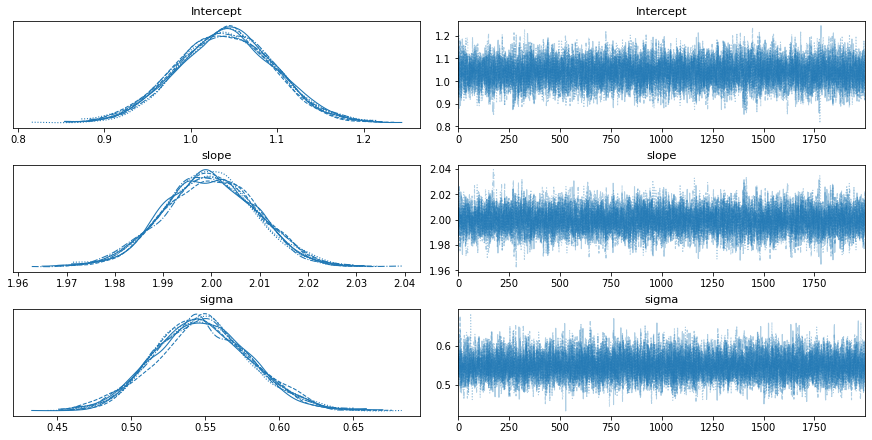

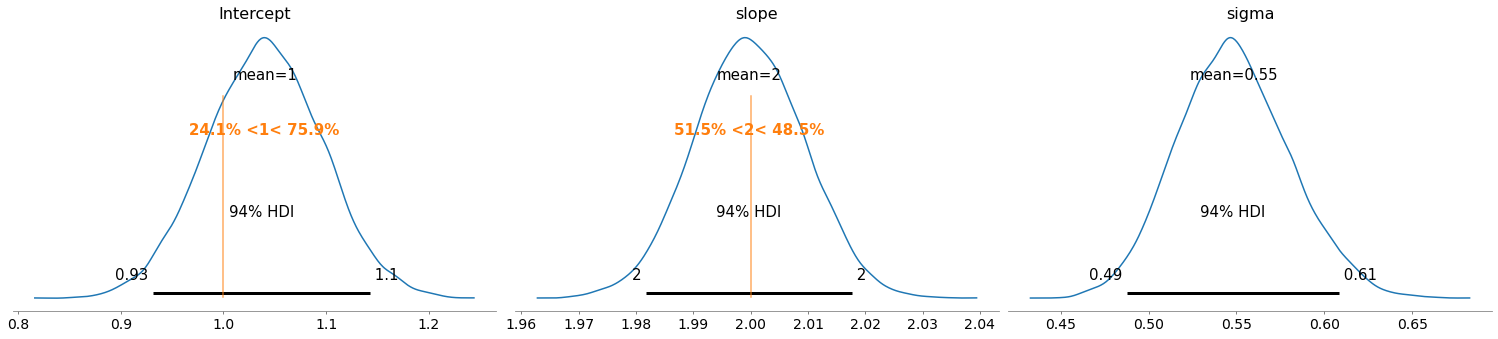

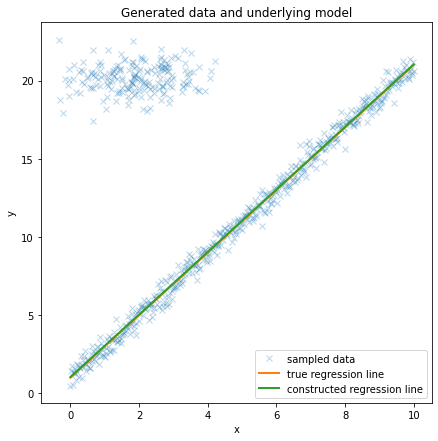

In [107]:

    
size = 500
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
# x_out = np.append(x, [0.1, 0.15, 0.2,5])
# y_out = np.append(y, [8, 6, 9,30])
x_out = np.append(x, 2+ np.random.normal(0,1,200))
y_out  = np.append(y, 20 + np.random.normal(0,1,200))



with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    lkl = pm.StudentT('y',nu=1,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000, cores=8)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




<ipython-input-53-687e8c6192d3>:28: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=8)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 24 seconds.
The acceptance probability does not match the target. It is 0.8897070772008349, but should be close to 0.8. Try to increase the number of tuning steps.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


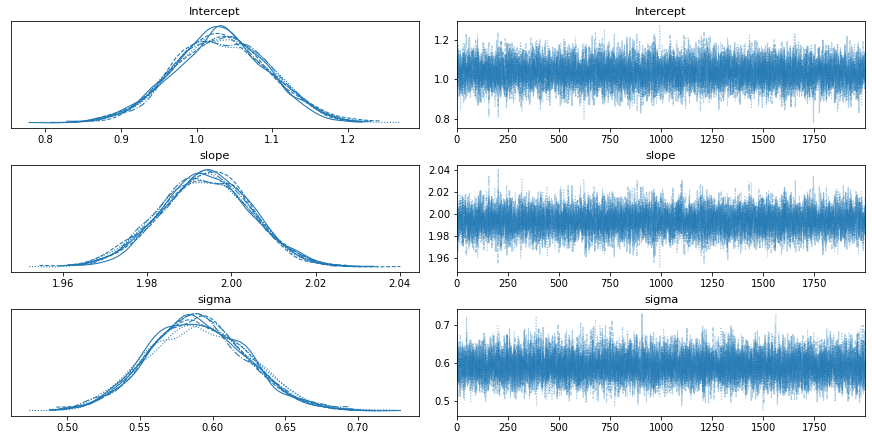

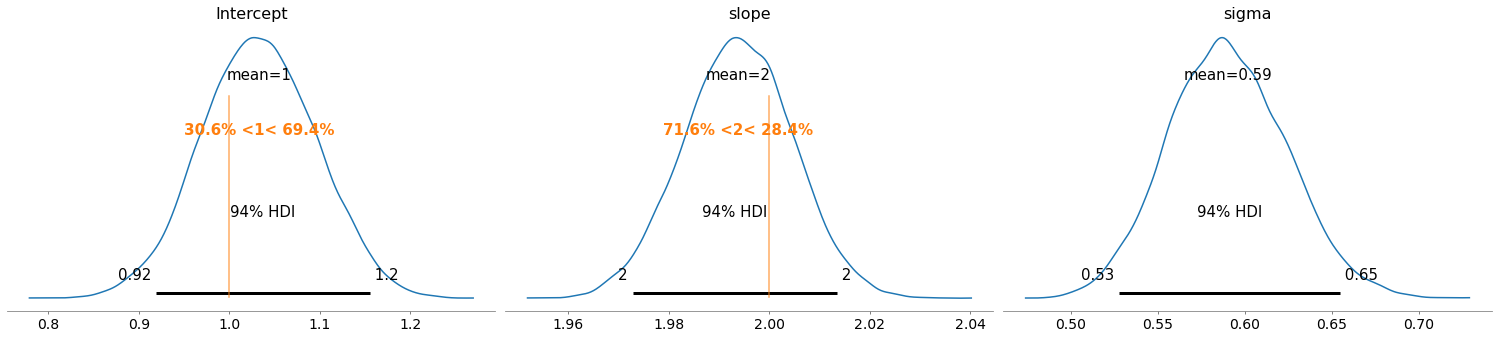

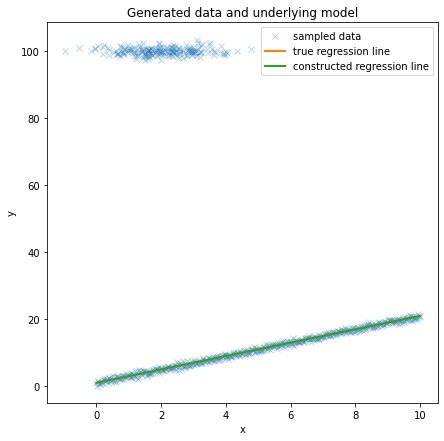

In [53]:

    
size = 500
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
# x_out = np.append(x, [0.1, 0.15, 0.2,5])
# y_out = np.append(y, [8, 6, 9,30])
x_out = np.append(x, 2+ np.random.normal(0,1,200))
y_out  = np.append(y, 100 + np.random.normal(0,1,200))



with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    lkl = pm.StudentT('y',nu=1,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000, cores=8)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




## Laplace likelihood 

<ipython-input-109-60c04d7d1f4c>:35: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=8)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [beta, sigma, slope, Intercept]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 26 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


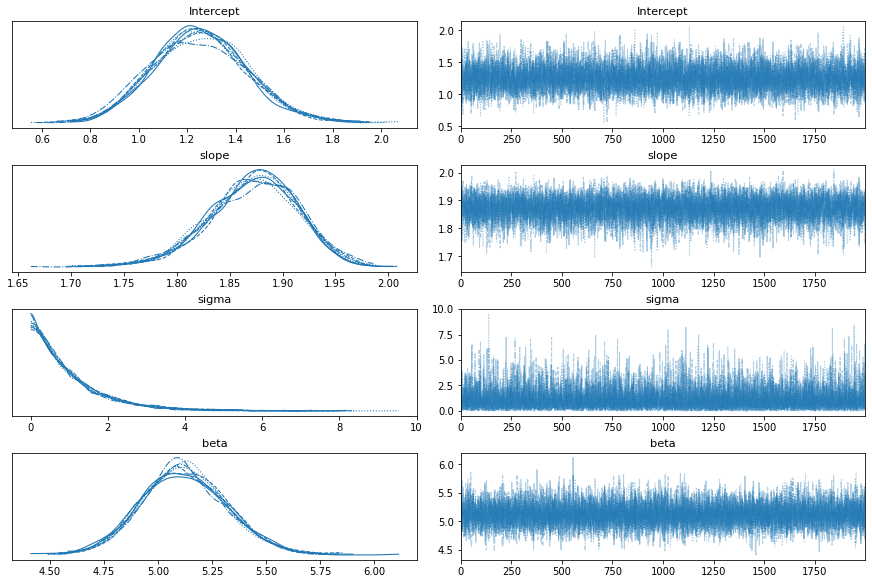

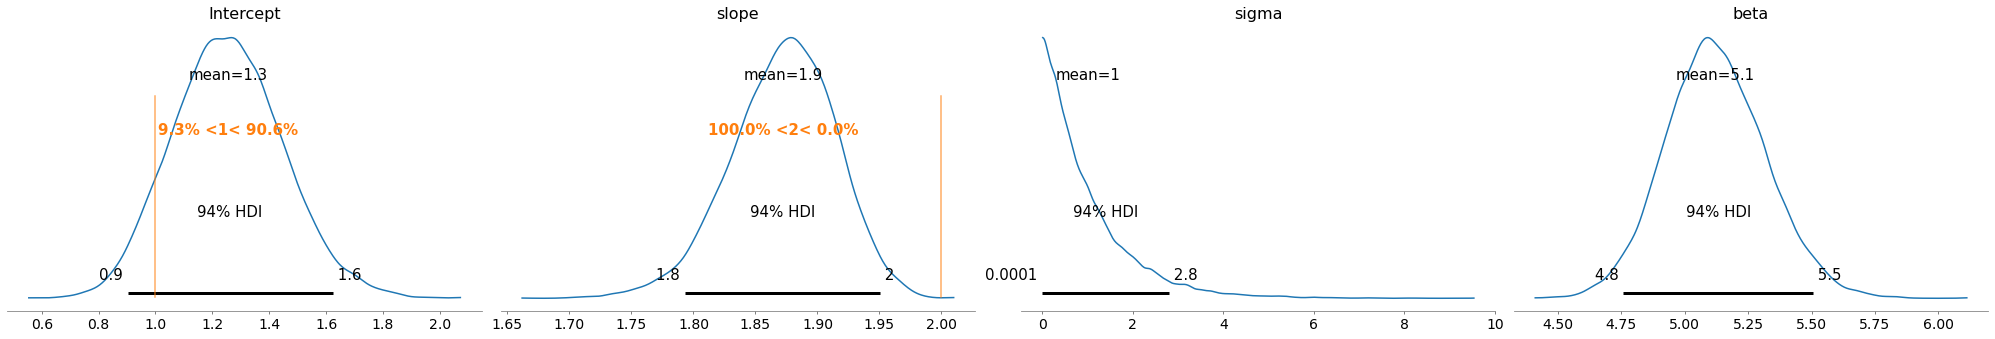

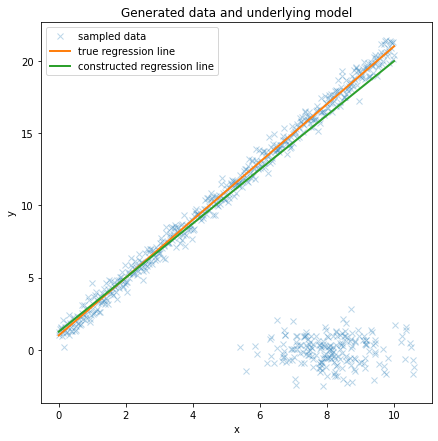

In [109]:

    
size = 500
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
# x_out = np.append(x, [0.1, 0.15, 0.2,5])
# y_out = np.append(y, [8, 6, 9,30])
x_out = np.append(x, 8+ np.random.normal(0,1,200))
y_out  = np.append(y, 0 + np.random.normal(0,1,200))


with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    # https://docs.pymc.io/pymc-examples/examples/generalized_linear_models/GLM-robust-with-outlier-detection.html
    # define prior for StudentT degrees of freedom
    # InverseGamma has nice properties:
    # it's continuous and has support x ∈ (0, inf)
    
    b = pm.InverseGamma("beta", alpha=3, beta=1)
    
    
    lkl = pm.Laplace('y',mu=mu,b=b,observed=y_out)
    
    trace = pm.sample(2000, cores=8)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x",alpha=0.3, label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




# Asymmetric Student T 

In [13]:
from scipy.stats import t as student_t

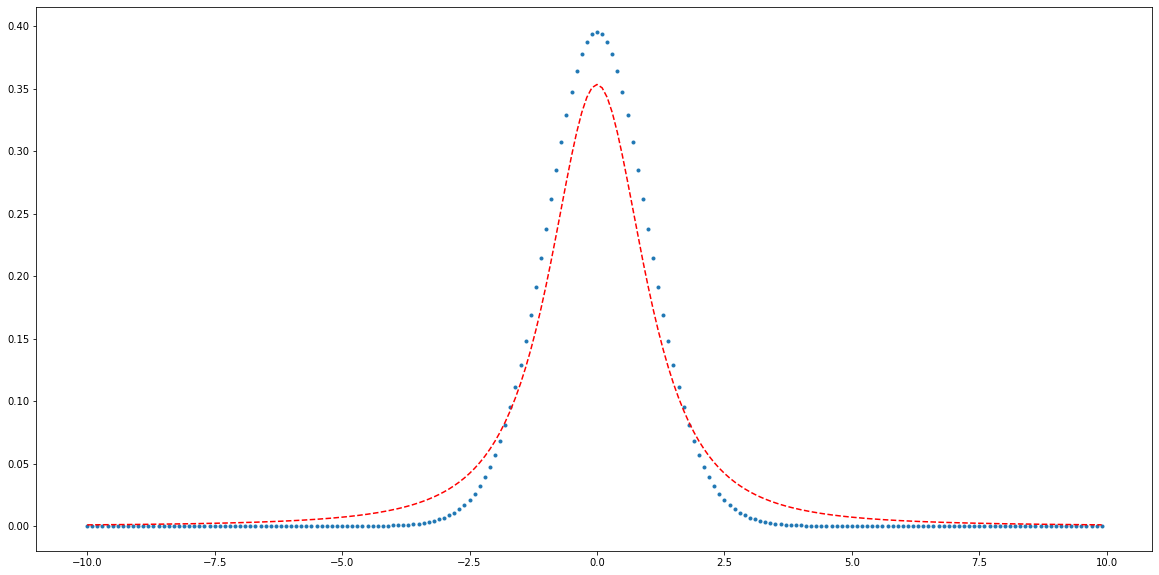

In [81]:
plt.figure(figsize=(20,10))

x = np.arange (-10, 10, 0.1) 
y1 = student_t.pdf(x,30,0,1)
y2 = student_t.pdf(x,2,0,1)
plt.plot(x, y1, ".", x, y2, "r--"); 

In [329]:
l = student_t.rvs(30,0,1,size=10000)
lvar = np.var(l)
l = l[l<0]

r = student_t.rvs(2,0,1,size=10000)
rvar = np.var(r)
r = r[r>0]

In [331]:
print (lvar,rvar)

1.0669684816851657 6.985145810232344


4.492139626615034

In [337]:
v = np.var(np.concatenate([l,r]))
vvar = np.var(v)
print (lvar,rvar,np.mean([lvar,rvar]))

1.0669684816851657 6.985145810232344 4.026057145958754


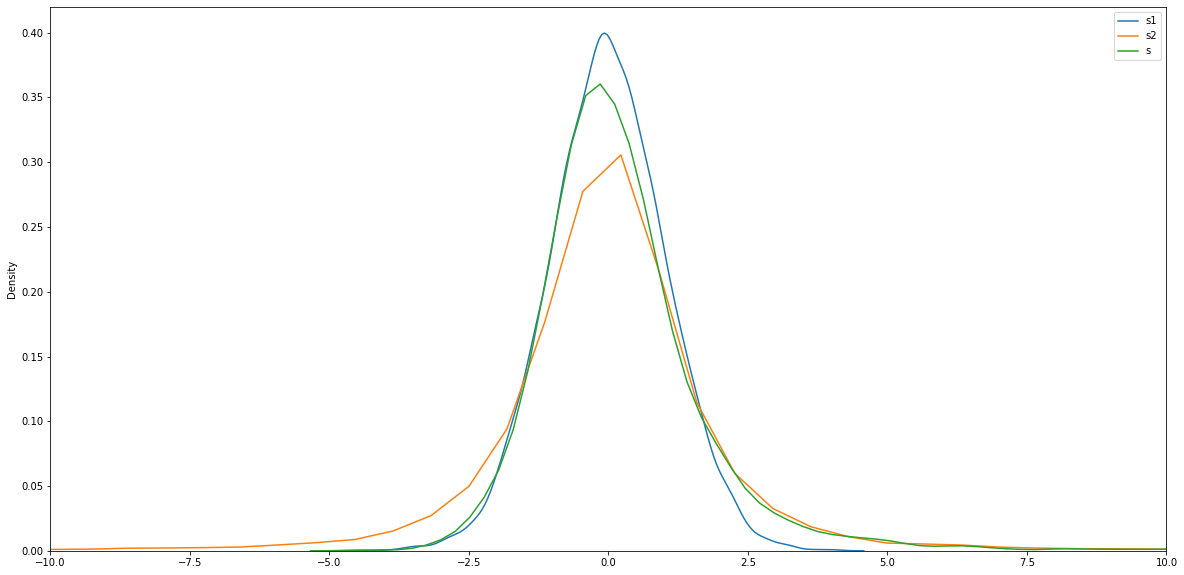

In [79]:
s1 = student_t.rvs(30,0,1,size=10000)
s2 = student_t.rvs(2,0,1,size=10000)
def assym_t_rvs(dfleft,dfright,loc,scale,size):
    tleft = student_t.rvs(30,loc,scale,size=size)
    tright = student_t.rvs(2,loc,scale,size=size)
    return np.random.choice(np.concatenate([tleft[tleft<loc], tright[tright>=loc]]), size)

s = assym_t_rvs(30,2,0,1,10000)

plt.figure(figsize=(20,10))
plt.xlim((-10, 10)) 
sns.kdeplot(s1,label='s1')
sns.kdeplot(s2,label='s2')
sns.kdeplot(s,label='s')

plt.legend();

In [16]:
import seaborn as sns 

In [211]:
with pm.Model() as m:
    def likelihood(nu1,nu2,mu,sigma):
        def logp(value):

            p1 = pm.StudentT.dist(nu=nu1,mu=mu,sigma=sigma).logp
            p2 = pm.StudentT.dist(nu=nu2,mu=mu,sigma=sigma).logp
            return pm.math.switch(value > mu, p2(value),p1(value))
        return logp
    
    d = pm.DensityDist('custom',logp=likelihood(30,2,0,1))
    trace = pm.sample(2000, cores=8,tune=1000)
    

<ipython-input-211-4f45dab3c921>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, cores=8,tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [custom]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.9153242629226078, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8864349565635852, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.5913307376651062, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6276393868594687, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.2903914099280795, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


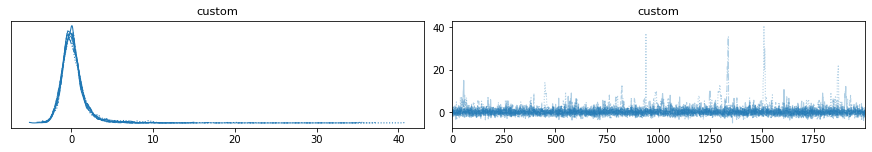

In [210]:
pm.plot_trace(trace);    

## Custom pymc3 class 

In [294]:
import theano.tensor as at 
from scipy import stats
from pymc3.distributions.continuous import get_tau_sigma, assert_negative_support, draw_values, generate_samples
from pymc3.distributions.dist_math import   bound, logpow, gammaln, betaln, std_cdf, alltrue_elemwise, SplineWrapper, i0e, normal_lcdf, normal_lccdf
from pymc3.math import switch
from pymc3.util import get_var_name as get_variable_name

In [246]:
generate_samples(student_t.rvs,30,0,1,dist_shape=3,size=10).shape

(10, 3)

In [448]:
class VincentT(Continuous):

    def __init__(self, nu1, nu2, mu=0, sigma=None, lam=None, sd=None, *args, **kwargs):
        super(VincentT, self).__init__(*args, **kwargs)
        
        if sd is not None: sigma = sd 
            
        self.nu1 = nu1 = tt.as_tensor_variable(nu1)
        self.nu2 = nu2 = tt.as_tensor_variable(nu2)
        
        lam, sigma = get_tau_sigma(tau=lam, sigma=sigma)
        self.lam = lam = tt.as_tensor_variable(lam)
        self.sigma = self.sd = sigma = tt.as_tensor_variable(sigma)
        self.mean = self.median = self.mode = self.mu = mu = tt.as_tensor_variable(mu)

        #devide points of the 2 dists, called A, B to + and -, we have 4 parts
        # A-,A+,B-,B+, suppose the mean is m
        #var1 = Sum( i - m) ** 2 for i in A
        #var2 = sum( i-m)**2 for i in B
        #new variable will take points from A- and B+
        # new var = Sum(i -m )**2 for i in (A- , B+)
        #         = sum(i -m)**2 for i in A- + sum( i - m)**2 for i in B+
        # the student t is symmetric, so variance from the - side will be equal from + side
        # so, new  var = var1/2                   + var2/2
        self.variance1 = tt.switch((nu1 > 2) * 1,
                                  (1 / self.lam) * (nu1 / (nu1 - 2)),
                                  np.inf)
        self.variance2 = tt.switch((nu2 > 2) * 1,
                                  (1 / self.lam) * (nu2 / (nu2 - 2)),
                                  np.inf)
        self.variance = (self.variance1 + self.variance2) / 2 
        
        assert_negative_support(lam, 'lam (sd)', 'StudentT')
        assert_negative_support(nu1, 'nu1', 'StudentT')
        assert_negative_support(nu2, 'nu2', 'StudentT')

    def random(self, point=None, size=None):
        """
        Draw random values from StudentT distribution.
        Parameters
        ----------
        point : dict, optional
            Dict of variable values on which random values are to be
            conditioned (uses default point if not specified).
        size : int, optional
            Desired size of random sample (returns one sample if not
            specified).
        Returns
        -------
        array
        """
        nu1,nu2, mu, lam = draw_values([self.nu1, self.nu2, self.mu, self.lam],
                                  point=point, size=size)
        points = []
        
        for s in range(int(self.shape[0])):
                
            sample1 = generate_samples(stats.t.rvs, nu1, loc=mu, scale=lam**-0.5,size=int(size*1.2))
            sample2 = generate_samples(stats.t.rvs, nu2, loc=mu, scale=lam**-0.5,size=int(size*1.2))
            sample1 = sample1[sample1 < mu]
            sample2 = sample2[sample2 >= mu]
            
            points += np.random.choice(np.concatenate([sample1,sample2]),size=size),
        
        return np.stack(points).T

    def logp(self, value):
        """
        Calculate log-probability of StudentT distribution at specified value.
        Parameters
        ----------
        value : numeric
            Value(s) for which log-probability is calculated. If the log probabilities for multiple
            values are desired the values must be provided in a numpy array or theano tensor
        Returns
        -------
        TensorVariable
        """
        nu1 = self.nu1
        nu2 = self.nu2
        
        mu = self.mu
        lam = self.lam
        sd = self.sd
        
        logp1 =  bound(gammaln((nu1 + 1.0) / 2.0)
                     + .5 * tt.log(lam / (nu1 * np.pi))
                     - gammaln(nu1 / 2.0)
                     - (nu1 + 1.0) / 2.0 * tt.log1p(lam * (value - mu)**2 / nu1),
                     lam > 0, nu1 > 0, sd > 0)
        logp2 =  bound(gammaln((nu2 + 1.0) / 2.0)
                     + .5 * tt.log(lam / (nu2 * np.pi))
                     - gammaln(nu2 / 2.0)
                     - (nu2 + 1.0) / 2.0 * tt.log1p(lam * (value - mu)**2 / nu2),
                     lam > 0, nu2 > 0, sd > 0)
        return tt.switch(value >= mu, logp2, logp1 )
    def _distr_parameters_for_repr(self):
        return ["nu1", "nu2", "mu", "lam"]


In [438]:
StudentT.dist(30,0,1,shape=(2,)).random(size=20)

array([[-1.09852603,  0.25288874],
       [ 1.8942122 ,  0.62659423],
       [ 0.06990793, -0.61536033],
       [-3.35003593,  0.91536924],
       [ 0.61830661, -0.80011518],
       [-0.71386321,  1.9108913 ],
       [ 0.11063544, -0.77835477],
       [-0.72835211, -0.67439567],
       [-1.16354348,  0.39409834],
       [-1.36578674, -0.05804264],
       [-0.37782896, -0.5438575 ],
       [-0.1348666 , -0.67551453],
       [ 0.45727221,  0.71039365],
       [ 0.06481383, -1.50785571],
       [ 0.5740898 ,  0.44668122],
       [ 0.74336547,  1.79099708],
       [-0.10760679, -0.12176196],
       [-0.24370917, -1.09672206],
       [ 0.72314574,  3.06486894],
       [-0.82446695,  1.20170321]])

In [445]:
VincentT.dist(30,2,0,1,shape=2)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano
from pymc3.distributions.continuous import VincentT, StudentT

<ipython-input-33-07fa30954fd6>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=4,tune=500)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [StudentT2, StudentT1, VincentT4_very_broad, VincentT3, VincentT2, VincentT1]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 42 seconds.
The acceptance probability does not match the target. It is 0.9160680527534647, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7052927265853796, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8878632334367805, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.

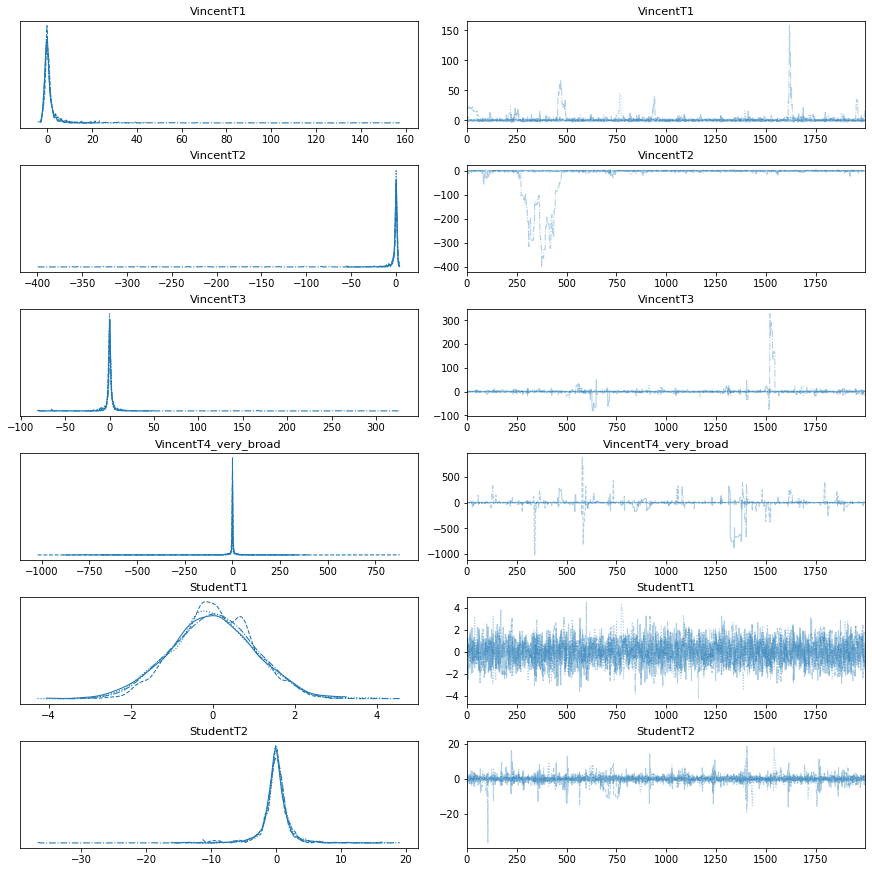

In [33]:
with pm.Model() as m:
    st1 = VincentT('VincentT1',nu1=30,nu2=1,mu=0,sigma=1)
    st1 = VincentT('VincentT2',nu1=1,nu2=30,mu=0,sigma=1)
    st1 = VincentT('VincentT3',nu1=1,nu2=1,mu=0,sigma=1)
    st1 = VincentT('VincentT4_very_broad',nu1=0.5,nu2=0.5,mu=0,sigma=1)
    
    st2 = StudentT('StudentT1',nu=30,mu=0,sigma=1)
    st2 = StudentT('StudentT2',nu=2,mu=0,sigma=1)
    
    trace = pm.sample(2000,cores=4,tune=500)

pm.plot_trace(trace);        

Looks good, see how the tails change based on nu parameters 

## Robust regression with assymetric student t

<ipython-input-13-5e92586d75e9>:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


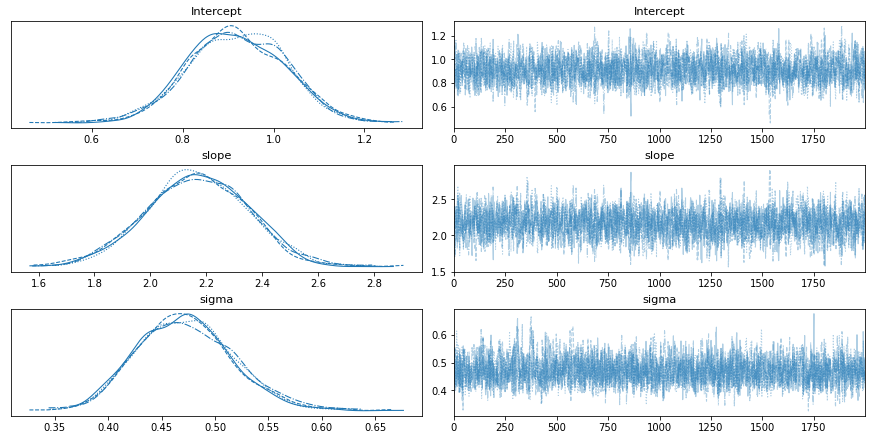

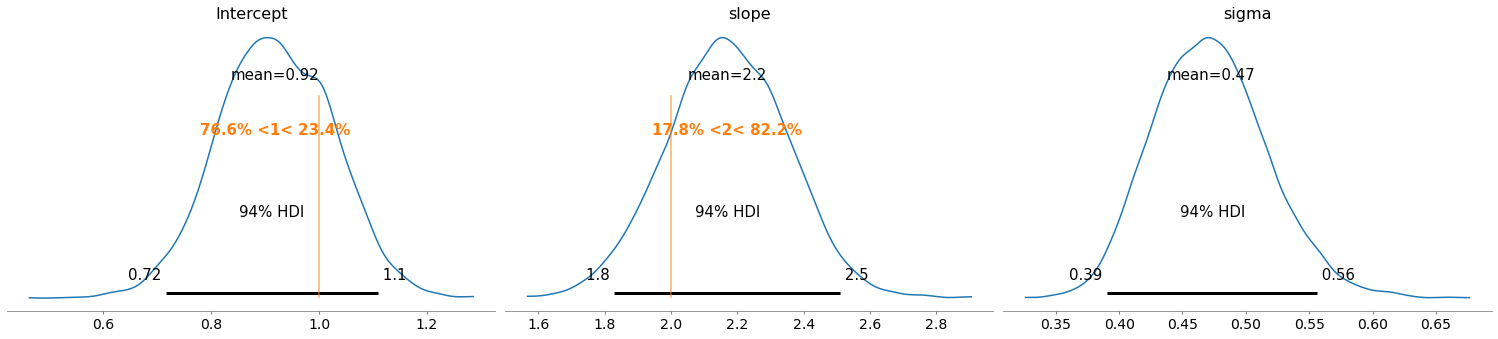

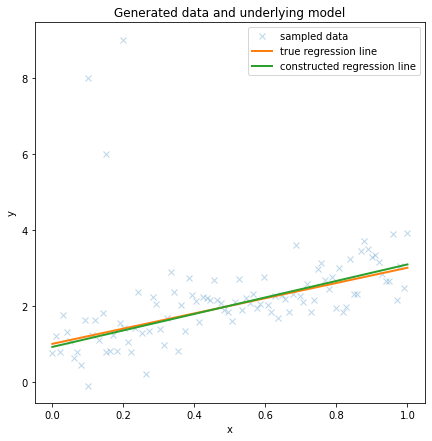

In [13]:

    
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])


with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out

    #smaller nu2
    #allow the higher side of the errors to have fatter tails (allow wilder values far from mean)
    lkl = VincentT('y',nu1=1e6,nu2=1,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000,cores=4)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);

Small dataset, should not show 2 modal in the estimated params 

<ipython-input-11-7547a5f158fc>:31: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu2, nu1, sigma, slope, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 55 seconds.
The number of effective samples is smaller than 10% for some parameters.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


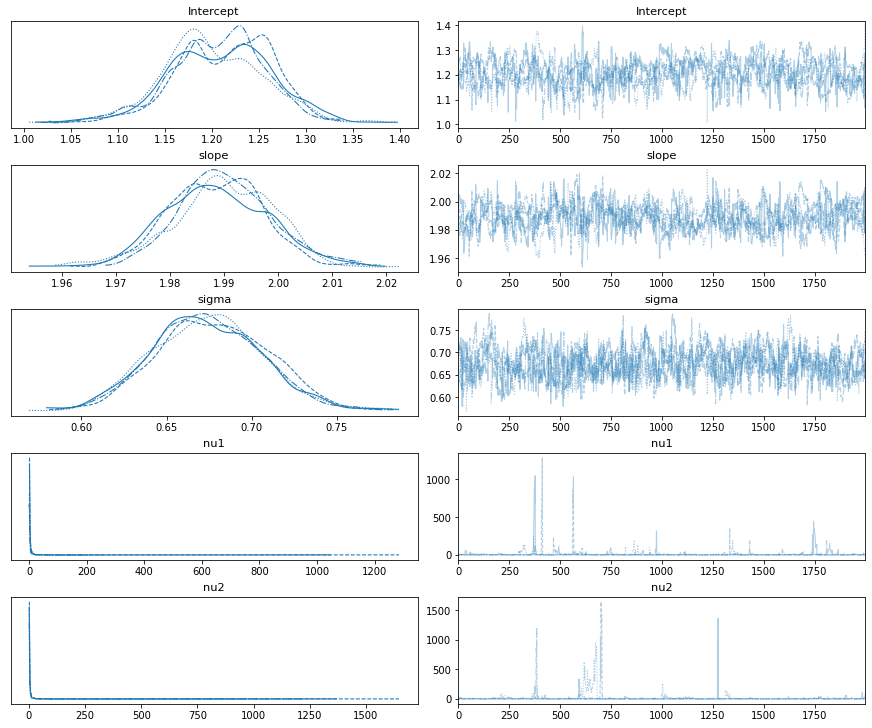

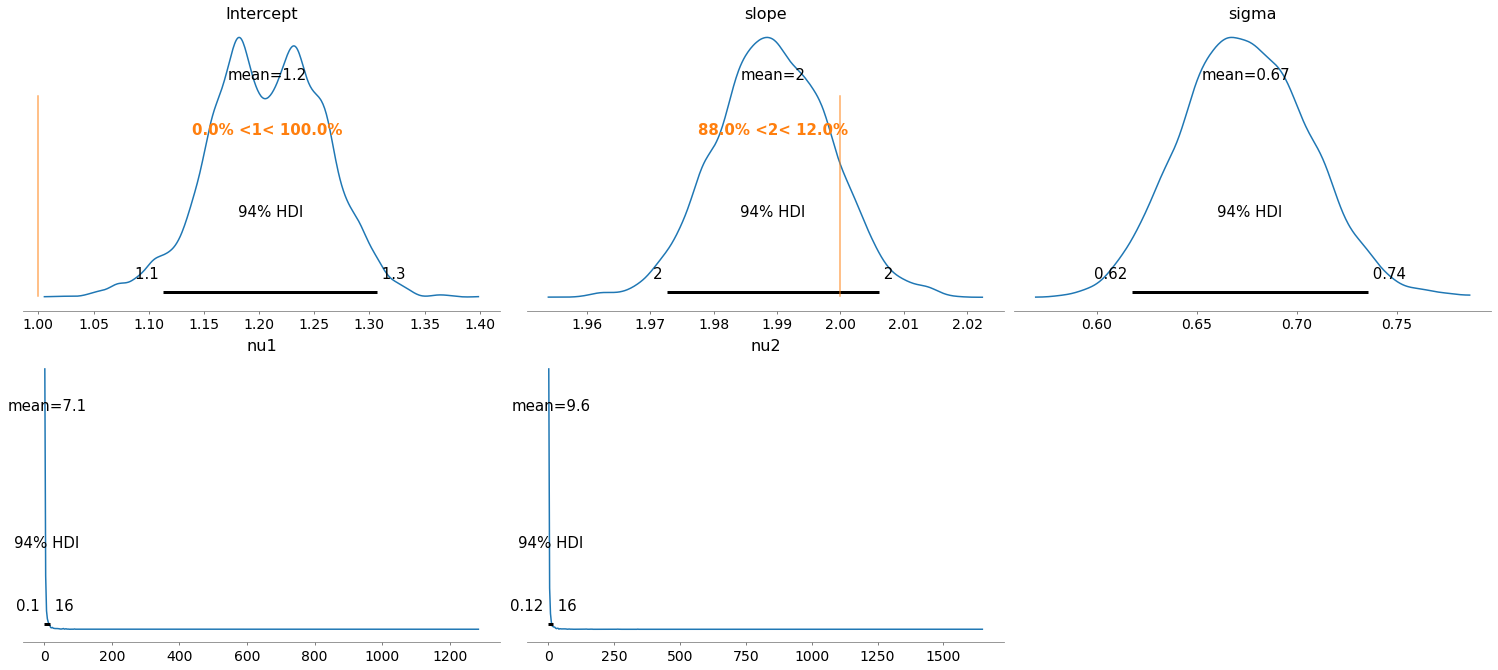

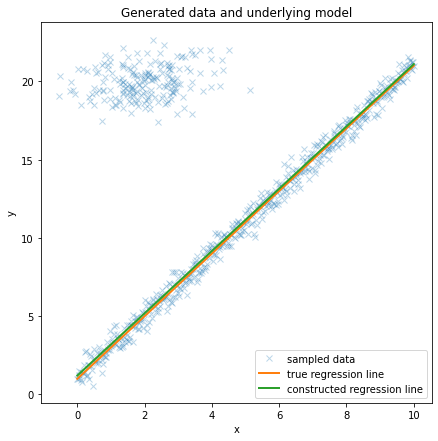

In [11]:

    
size = 500
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
# x_out = np.append(x, [0.1, 0.15, 0.2,5])
# y_out = np.append(y, [8, 6, 9,30])
x_out = np.append(x, 2+ np.random.normal(0,1,200))
y_out  = np.append(y, 20 + np.random.normal(0,1,200))



with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    
    #allow the higher side of the errors to have fatter tails (allow wilder values far from mean)
    lkl = VincentT('y',nu1=1e6,nu2=1,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000,cores=4)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




larger dataset, a clump of points outside the line does not guarantee the unimodal of the param estimation, 
a good robust regression should be able to deal with that 

## Let's break it  with horrible nu parameters

<ipython-input-16-08cfb1124b84>:31: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


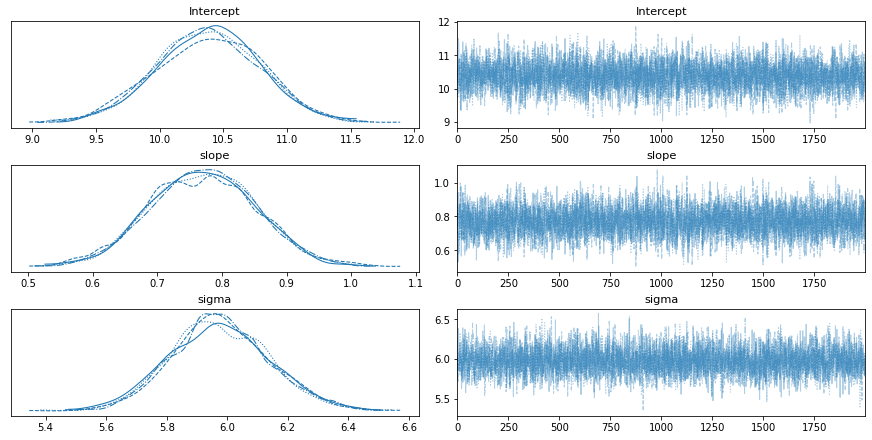

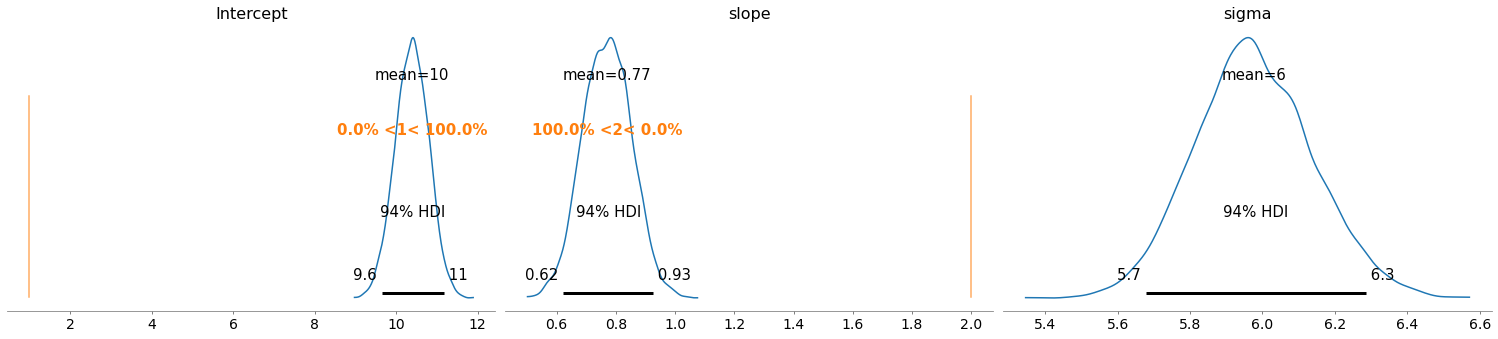

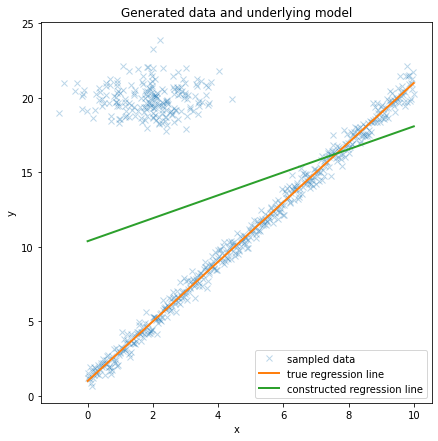

In [16]:

    
size = 500
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
# x_out = np.append(x, [0.1, 0.15, 0.2,5])
# y_out = np.append(y, [8, 6, 9,30])
x_out = np.append(x, 2+ np.random.normal(0,1,200))
y_out  = np.append(y, 20 + np.random.normal(0,1,200))



with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    

    #super high nu1 and nu2, this distribution should behave like Gaussian, which
    #is not robust at all 
    lkl = VincentT('y',nu1=1e6,nu2=1e6,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000,cores=4)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




as expected 

<ipython-input-17-de9a4641905a>:30: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 49 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


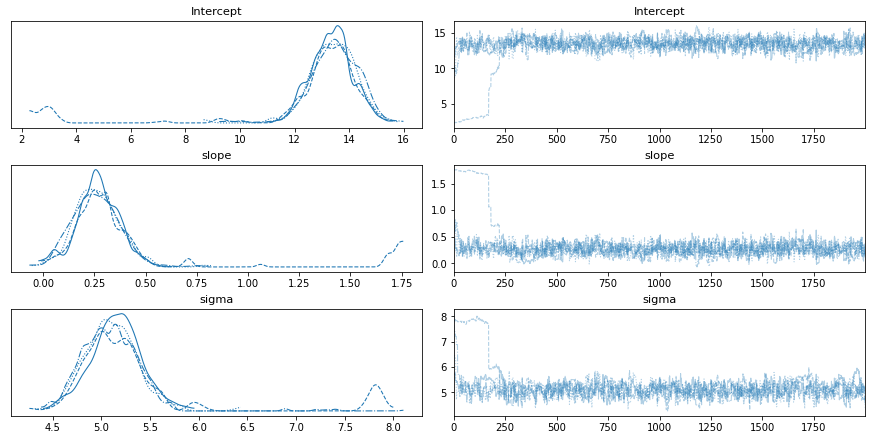

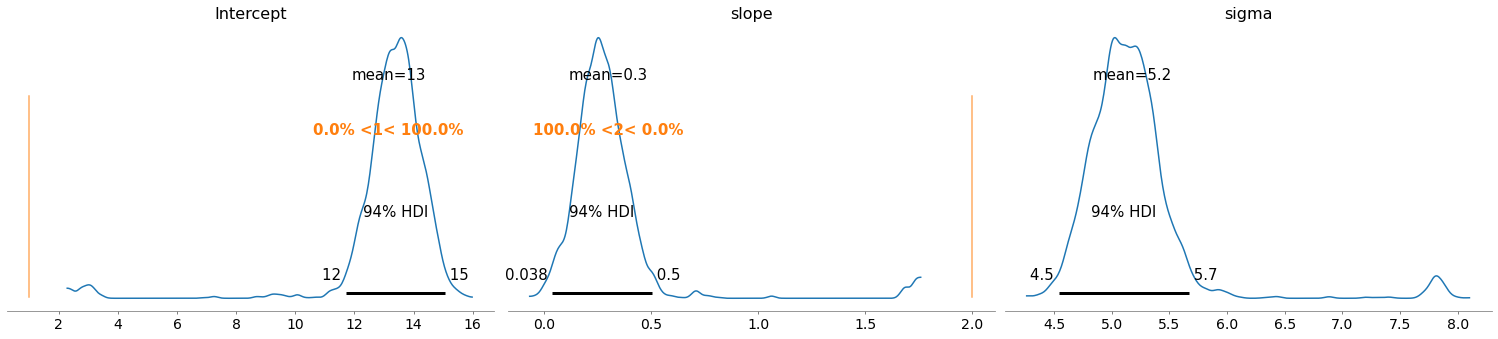

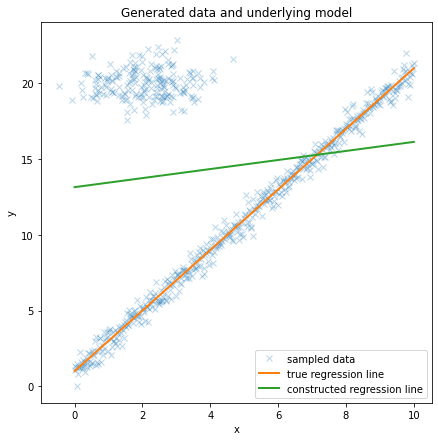

In [17]:

    
size = 500
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
# x_out = np.append(x, [0.1, 0.15, 0.2,5])
# y_out = np.append(y, [8, 6, 9,30])
x_out = np.append(x, 2+ np.random.normal(0,1,200))
y_out  = np.append(y, 20 + np.random.normal(0,1,200))



with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    

    #fat tail on the wrong side of the distribution
    lkl = VincentT('y',nu1=1,nu2=1e6,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000,cores=4)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




broken as expected 

## Fix the tail on one side and place a prior on the other 

<ipython-input-67-9ad6069c0d37>:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=8,tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [nu2, sigma, slope, Intercept]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 57 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


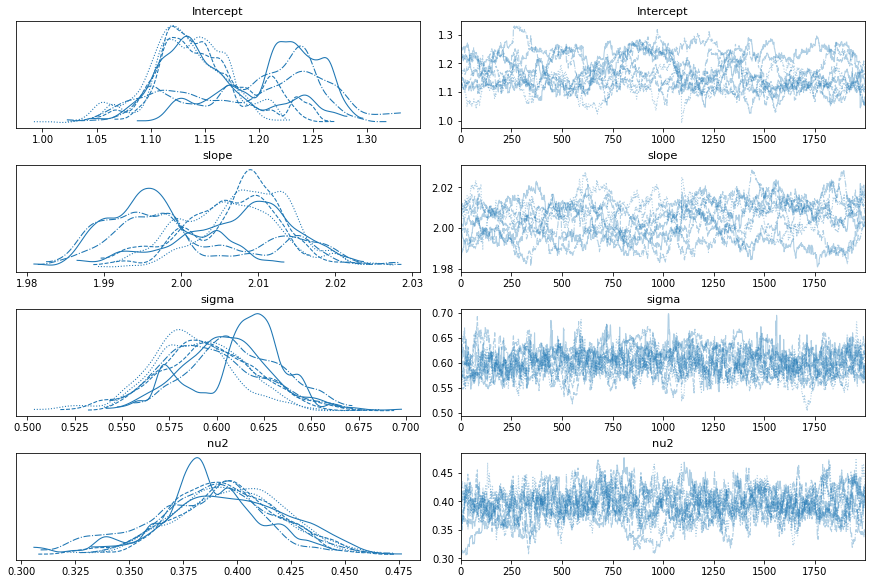

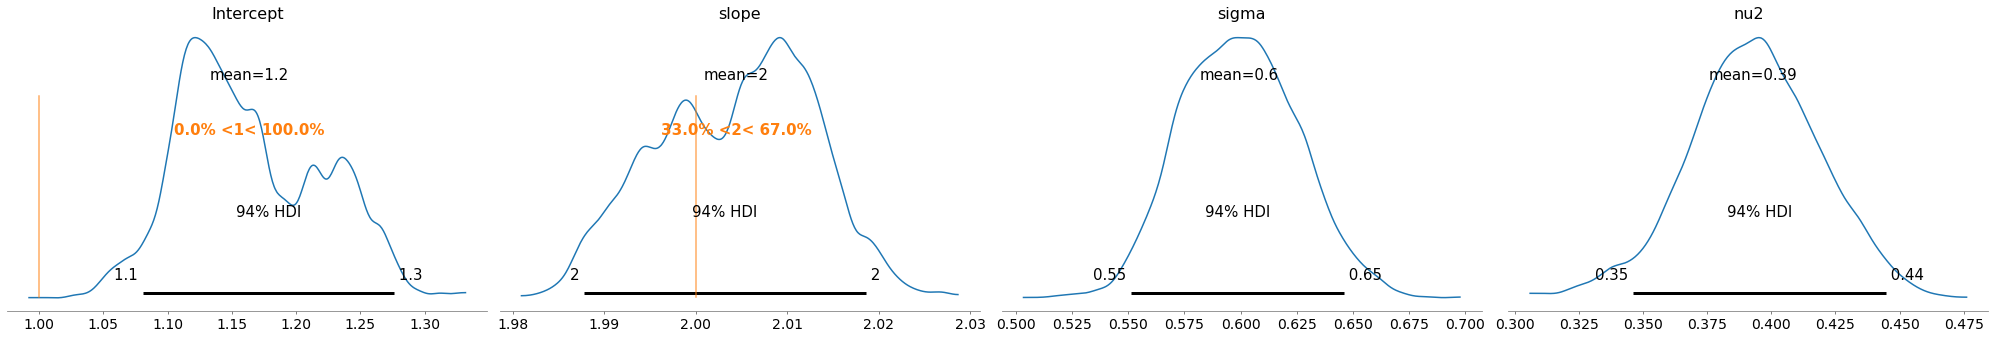

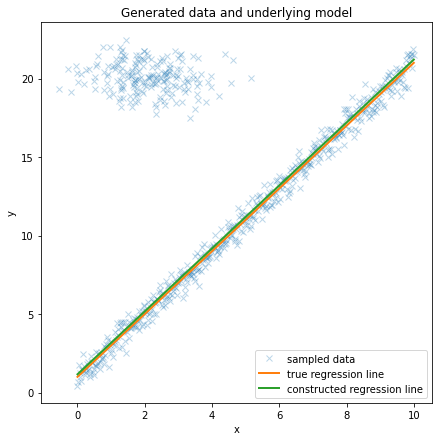

In [67]:

    
size = 500
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
# x_out = np.append(x, [0.1, 0.15, 0.2,5])
# y_out = np.append(y, [8, 6, 9,30])
x_out = np.append(x, 2+ np.random.normal(0,1,200))
y_out  = np.append(y, 20 + np.random.normal(0,1,200))



with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    

#     nu2 = pm.Normal("nu2", mu=1.5,sigma=0.5/3)
    nu2 = pm.Uniform('nu2',0.0, 3.)
#     nu2 = pm.InverseGamma("nu2", alpha=1, beta=1)
    
    lkl = VincentT('y',nu1=1e6,nu2=nu2,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000,cores=8,tune=1000)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




<ipython-input-70-83f17ce62855>:32: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu2, sigma, slope, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 36 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


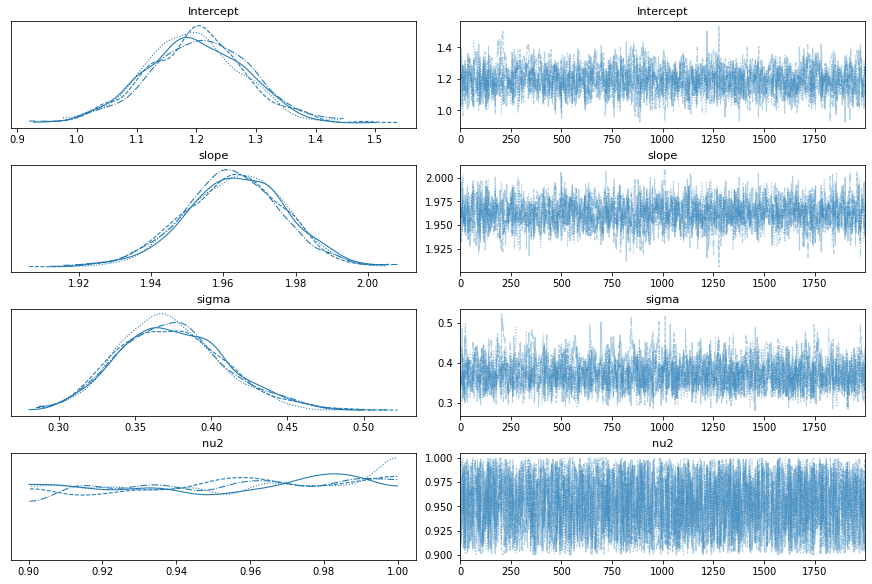

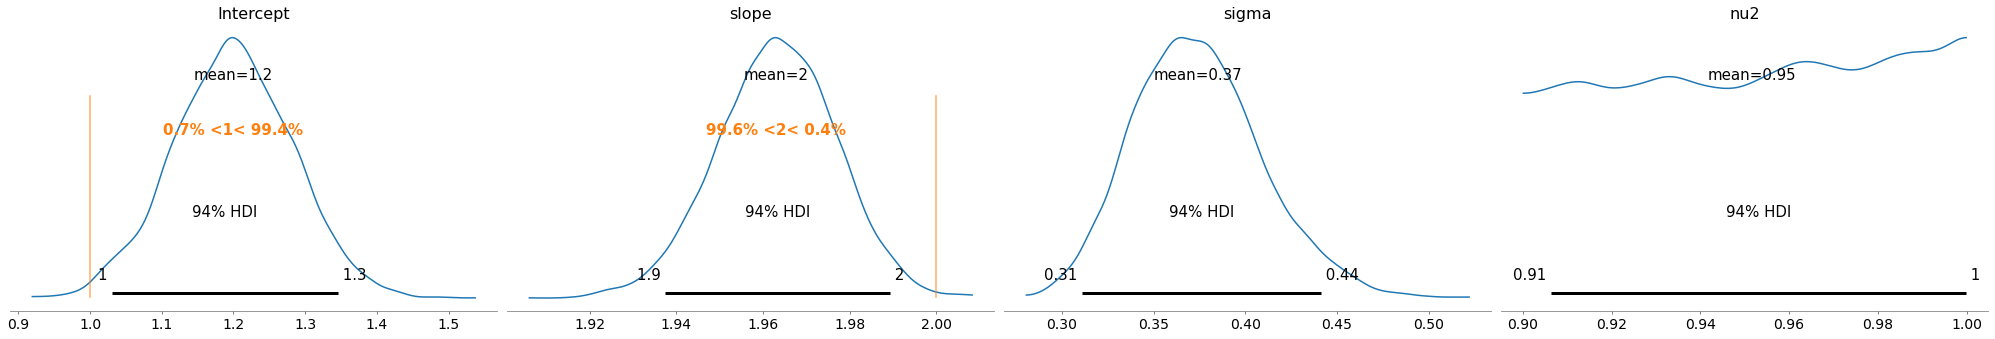

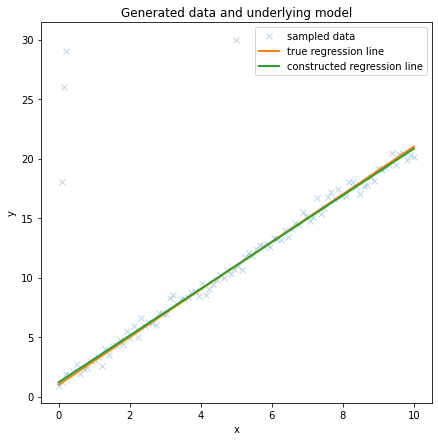

In [70]:

    
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2,5])
y_out = np.append(y, [18, 26, 29,30])
# x_out = np.append(x, 2+ np.random.normal(0,1,200))
# y_out  = np.append(y, 20 + np.random.normal(0,1,200))



with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    sigma = pm.Exponential("sigma", 1.)
    mu = intercept + x_coeff * x_out
    

#     nu2 = pm.InverseGamma("nu2", alpha=1, beta=1)
    nu2 = pm.Uniform('nu2',0.9, 1.)
    
    lkl = VincentT('y',nu1=1e6,nu2=nu2,mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000,cores=4)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




# Shifted-Exponential for one side robust regression

## Explicit exponential error term added 

<ipython-input-3-0f1c7c99c339>:31: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, error, average_error, slope, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 289 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6515049564474837, but should be close to 0.8. Try to increase the number of tuning steps.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 47 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a mo

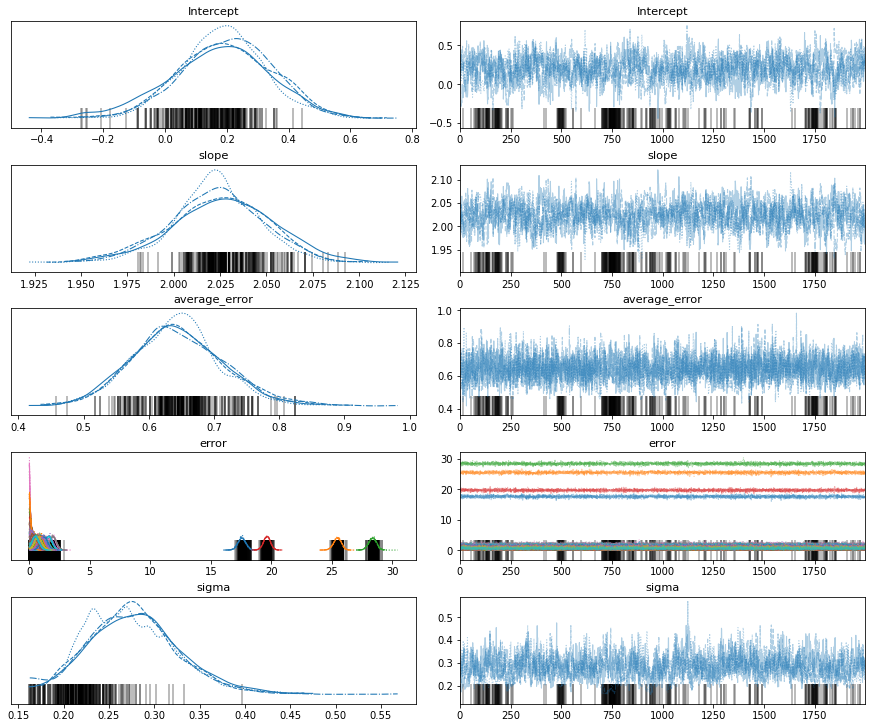

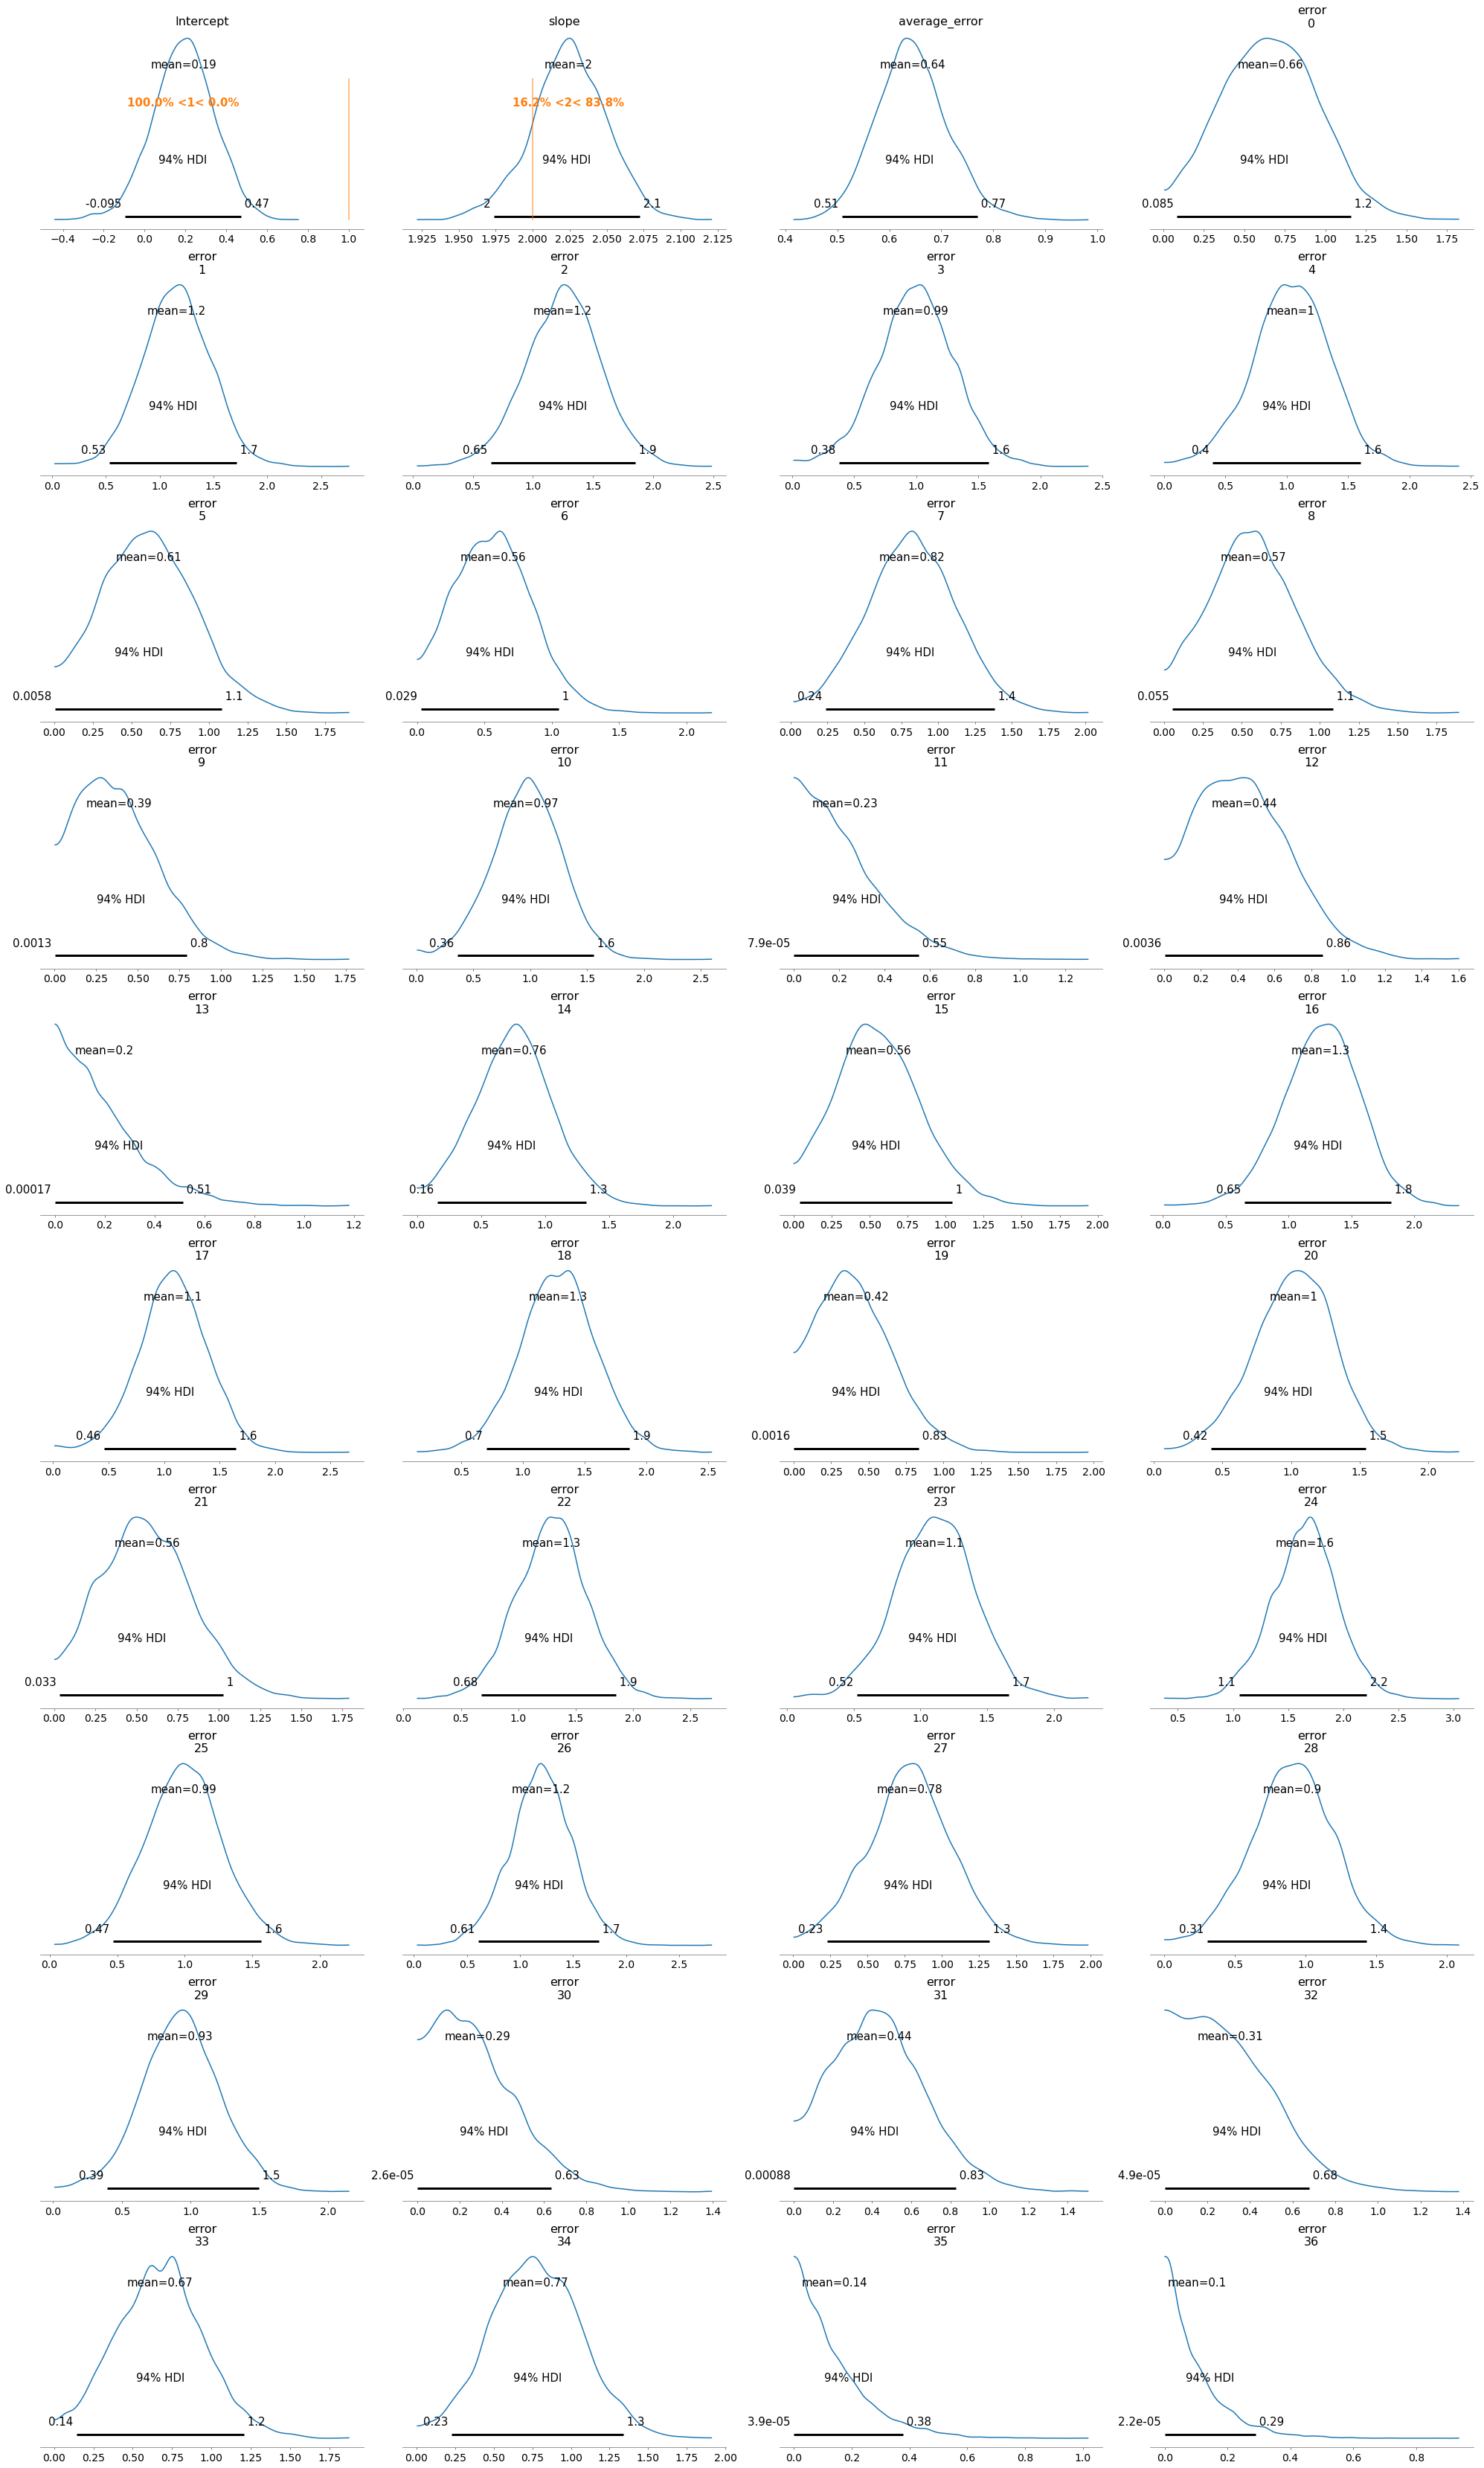

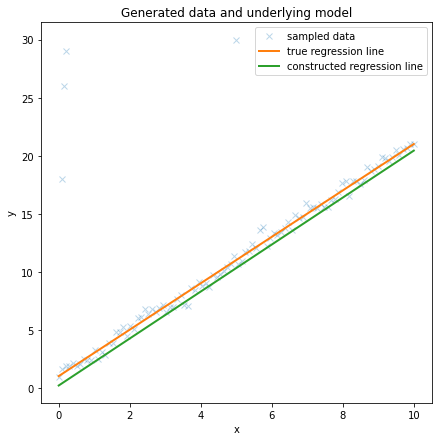

In [3]:
    
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2,5])
y_out = np.append(y, [18, 26, 29,30])
# x_out = np.append(x, 2+ np.random.normal(0,1,200))
# y_out  = np.append(y, 20 + np.random.normal(0,1,200))



with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    lamb = pm.HalfNormal('average_error',10)
    error = pm.Exponential("error", lamb,shape=[len(x_out),])
    mu = intercept + x_coeff * x_out + error
    
    sigma = pm.HalfNormal("sigma", 10)

    lkl = pm.Normal('like',mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000,cores=4)
    
pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);





not as terrible as ols, but still not good enough, as this will break for larger dataset 

<ipython-input-79-c8a79c2f705c>:32: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, error, average_error, slope, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 31 seconds.
The acceptance probability does not match the target. It is 0.9204429679774562, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8893713110955872, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9693288649379475, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future

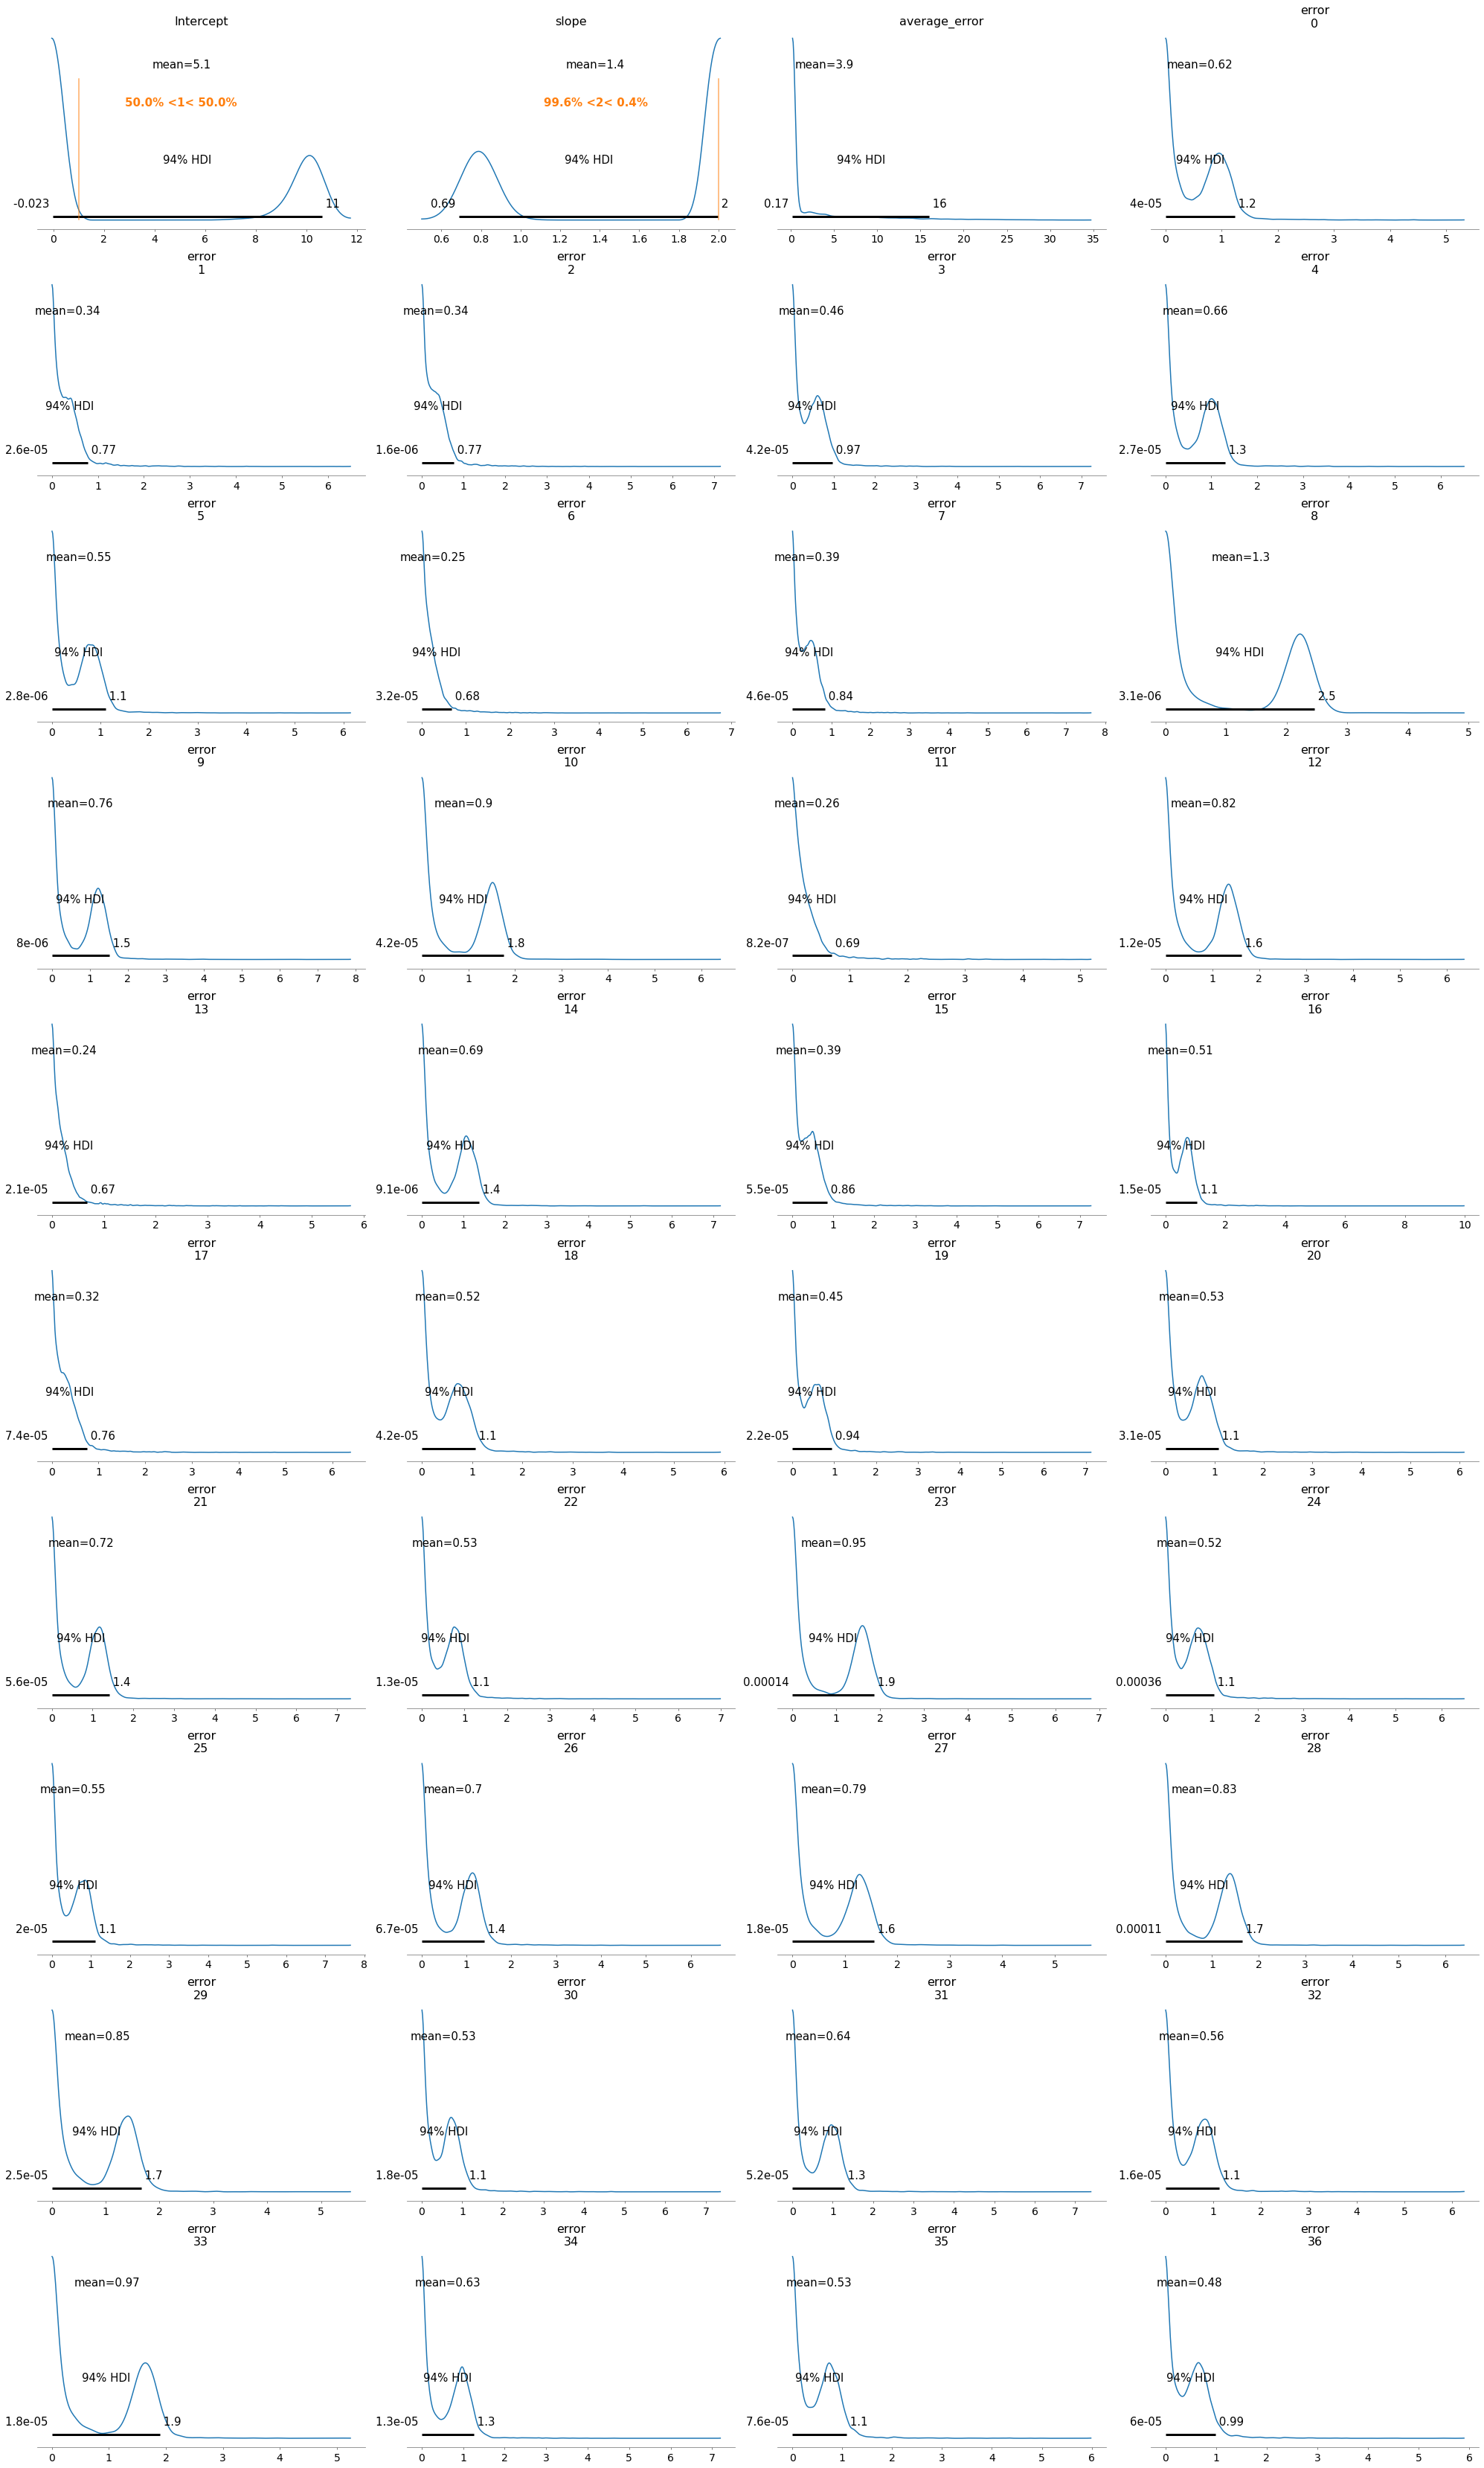

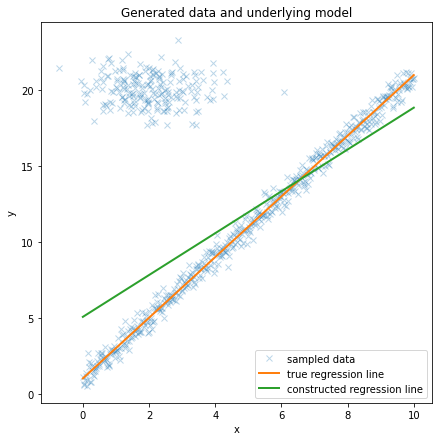

In [79]:

    
size = 500
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# Add outliers
# x_out = np.append(x, [0.1, 0.15, 0.2,5])
# y_out = np.append(y, [8, 6, 9,30])
x_out = np.append(x, 2+ np.random.normal(0,1,200))
y_out  = np.append(y, 20 + np.random.normal(0,1,200))




with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    lamb = pm.HalfNormal('average_error',10)
    error = pm.Exponential("error", lamb,shape=[len(x_out),])
    mu = intercept + x_coeff * x_out + error
    
    sigma = pm.HalfNormal("sigma", 10)

    lkl = pm.Normal('like',mu=mu,sigma=sigma,observed=y_out)
    
    trace = pm.sample(2000,cores=4)
    
# pm.plot_trace(trace);    
pm.plot_posterior(trace,
               ref_val={
                       "Intercept":[{'ref_val':true_intercept}],
                       'slope':[{'ref_val':true_slope}]}
              );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




In [1]:
import dill
import multiprocessing as mp
mp.set_start_method("fork")
   

Exponential for error does not cut it 

## Shifted exponential

<ipython-input-23-cff14bbc4287>:38: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000,cores=1,chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [error, slope, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.
There were 1780 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3721 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5568 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8806839229389909, but should be close to 0.8. Try to increase the number of tuning steps.
There were 7493 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5254992009888513, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


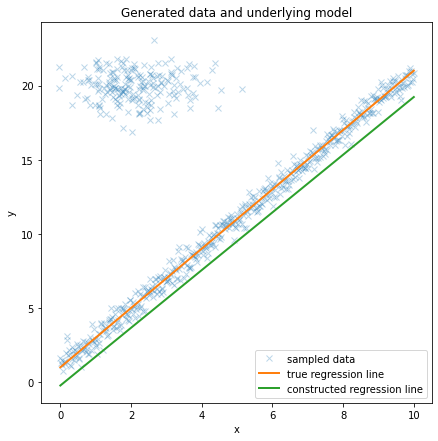

In [23]:
 
size = 500
true_intercept = 1
true_slope = 2

x = np.linspace(0, 10, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

# # Add outliers
# x_out = np.append(x, [0.1, 0.15, 0.2,5])
# y_out = np.append(y, [8, 6, 9,30])
x_out = np.append(x, 2+ np.random.normal(0,1,200))
y_out  = np.append(y, 20 + np.random.normal(0,1,200))

class shiftedExp(pm.Exponential):
    def __init__(self, lam=1., shift=0, *args, **kwargs):
        super().__init__(lam=lam, *args, **kwargs)
        self.lam = lam
        self.shift = shift
    
    def logp(self, value):
        return super().logp(value-self.shift)


with pm.Model() as lr:
    intercept = pm.Normal("Intercept",mu=0, sigma=20)
    x_coeff = pm.Normal("slope",mu=0,sigma=20)
    
    mu = intercept + x_coeff * x_out 
#     mu = pm.Normal('line',mu=mu,sigma=1,shape=(len(x_out,)))
    
    lamb = pm.HalfNormal('error',2)
    
    lkl = shiftedExp('like',lam=lamb,shift=mu,observed=y_out)
    
    trace = pm.sample(2000,cores=1,chains=4)
    
# pm.plot_trace(trace);    
# pm.plot_posterior(trace,var_names=['Intercept','slope'],
#                ref_val={
#                        "Intercept":[{'ref_val':true_intercept}],
#                        'slope':[{'ref_val':true_slope}]}
#               );    


constructed_line = trace['Intercept'].mean() + trace['slope'].mean() * x
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data",alpha=0.3)
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
ax.plot(x, constructed_line, label="constructed regression line", lw=2.0)
plt.legend(loc=0);




In [25]:
pm.__version__

'3.11.4'

In [26]:
np.__version__

'1.21.2'

In [27]:
np.floa t128

numpy.float128